# Prediction of students’ performance using random forest regression 

# data preprocessing 
## Question 1


In [4]:
#IMPORT RELEVANT PACKAGES: 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 
from scipy.stats import chi2_contingency
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


read the csv file seprated by the semicolun(;) then label the data for maths strudents do same for the portuguese students data set 

In [5]:
df1= pd.read_csv('student-mat.csv',sep=';') 
df1['subject']= "Maths"
df2= pd.read_csv('student-por.csv',sep=';') 
df2['subject']="Portuguese"
df=df1.merge(df2,how='outer',on=df1.columns.tolist()) 
df.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
439,GP,F,16,U,LE3,T,2,2,other,at_home,...,3,3,2,2,5,14,10,11,11,Portuguese
677,GP,M,18,U,GT3,T,3,2,services,other,...,4,5,2,4,5,8,7,8,7,Portuguese
855,MS,F,15,R,GT3,T,1,1,at_home,other,...,3,3,1,1,2,1,11,10,11,Portuguese
475,GP,M,15,U,GT3,T,2,3,other,services,...,2,2,1,3,3,0,11,11,12,Portuguese
627,GP,F,17,U,GT3,T,2,3,at_home,other,...,3,3,1,4,3,4,12,13,13,Portuguese


SIZE OF THE DATA 

In [6]:
df.size


35496

NUMBERS OF ROWS 

In [7]:
#rows
df.shape[0]

1044

NUMBERS OF COLUMNS 

In [8]:
#columns
df.shape[1]

34

In [9]:
#sample data of with all columns names 
df.T.iloc[:,:10]

,0,1,2,3,4,5,6,7,8,9
school,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP
sex,F,F,F,F,F,M,M,F,M,M
age,18,17,15,15,16,16,16,17,15,15
address,U,U,U,U,U,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3,LE3,LE3,GT3,LE3,GT3
Pstatus,A,T,T,T,T,T,T,A,A,T
Medu,4,1,1,4,3,4,2,4,3,3
Fedu,4,1,1,2,3,3,2,4,2,4
Mjob,at_home,at_home,at_home,health,other,services,other,other,services,other
Fjob,teacher,other,other,services,other,other,other,teacher,other,other


# Each columns datatype|

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

# check for the missing value 

In [11]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
subject       0
dtype: int64

# Find the duplicated rows according to Idenctical attributes of students 
in This case maybe happend that same duplicated rows may have diifernt grades

In [12]:
duplicated_rows=df.duplicated(subset=["school","sex","age","address","famsize","Pstatus",
                                      "Medu","Fedu","Mjob","Fjob","reason","nursery","internet"],keep='first')
df[duplicated_rows]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
144,GP,M,17,U,GT3,T,2,1,other,other,...,4,5,1,2,5,0,5,0,0,Maths
148,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,3,2,2,1,5,0,7,6,0,Maths
181,GP,M,16,U,GT3,T,3,3,services,other,...,2,3,1,2,3,2,12,13,12,Maths
341,GP,M,18,U,GT3,T,4,4,teacher,services,...,3,3,2,2,2,0,10,10,0,Maths
395,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,Portuguese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,Portuguese
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,Portuguese
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,Portuguese
1042,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,Portuguese


# Find the duplicated rows according to Idenctical attributes of students and grades
in This case maybe happend that same duplicated rows may have study differnt course maths or portuguese

In [13]:
duplicated_rows=df.duplicated(subset=["school","sex","age","address","famsize","Pstatus",
                                      "Medu","Fedu","Mjob","Fjob","reason","nursery","internet","G1","G2","G3"])
df[duplicated_rows]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
712,GP,F,17,U,LE3,T,2,2,services,other,...,4,4,2,3,5,6,12,12,12,Portuguese
774,GP,M,17,R,GT3,T,2,2,services,other,...,4,5,5,5,4,2,11,10,10,Portuguese
878,MS,F,16,R,GT3,T,2,2,other,other,...,4,5,1,2,1,1,9,10,11,Portuguese


# Find the duplicated rows according to Idenctical attributes of students and grades aloge with subject name 

In [14]:
duplicated_rows=df.duplicated(subset=["school","sex","age","address","famsize","Pstatus","Medu","Fedu",
                                      "Mjob","Fjob","reason","nursery","internet","G1","G2","G3","subject"],keep='first')
df[duplicated_rows]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
878,MS,F,16,R,GT3,T,2,2,other,other,...,4,5,1,2,1,1,9,10,11,Portuguese


# remove the duplicated rows according to Idenctical attributes of students and grades aloge with subject name

In [15]:
df=df.drop_duplicates(subset=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason",
                              "nursery","internet","G1","G2","subject"],keep='last')
df=df.reset_index(drop=True)
df


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Maths
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Maths
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Maths
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Maths
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Maths
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,Portuguese
1039,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,Portuguese
1040,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,Portuguese
1041,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,Portuguese


# unique values according the each columns


unique_counts = df.nunique()
unique_counts

# function to plot the boxplot and histogram 
This function plot the boxplot and histogram of columns which have more then 6 unique values

In [16]:
def boxanddistplot(df):
    unique_counts = df.nunique()
    selected_columns = unique_counts[unique_counts >= 6].index.tolist()
    for column_name in selected_columns:
        plt.figure(figsize=(15, 6))
        plt.subplot(1, 2, 1)
        sns.boxplot(x=column_name,data=df)
        plt.title(f"box Plot of {column_name}",fontsize=16,loc='center')
        plt.xlabel(f"{column_name}")
        plt.subplot(1,2,2)
        sns.histplot(df[column_name], kde=True,bins=df[column_name].nunique() ,kde_kws=dict(cut=3))
        plt.xlabel(f"{column_name}")
        plt.ylabel('no of students')
        plt.title(f" Histogram of {column_name}",fontsize=16,loc='center')
        plt.show()
    

# box plot and histogram before outlier capping

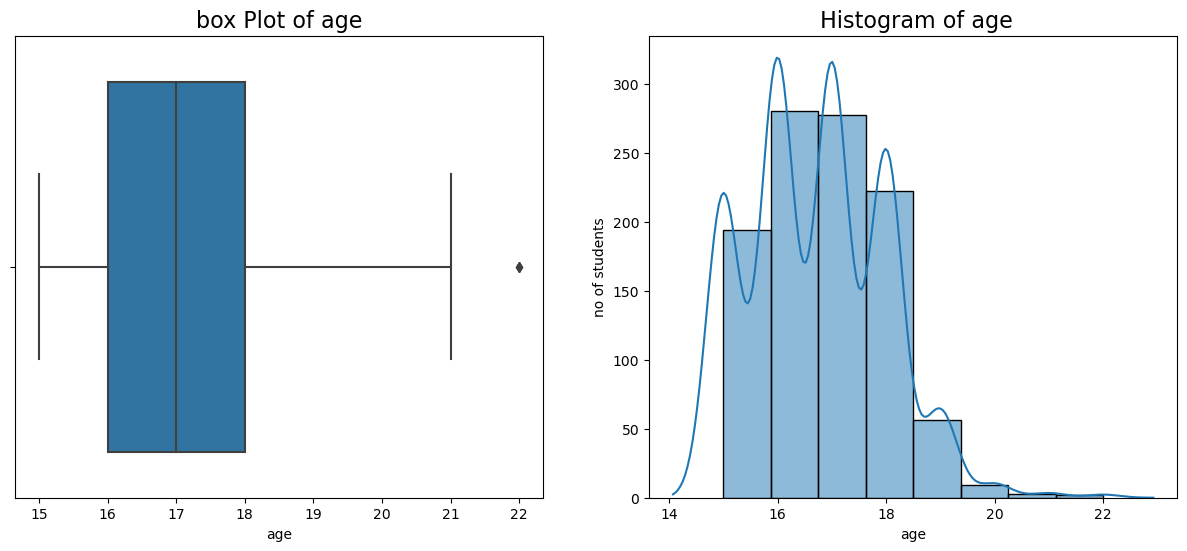

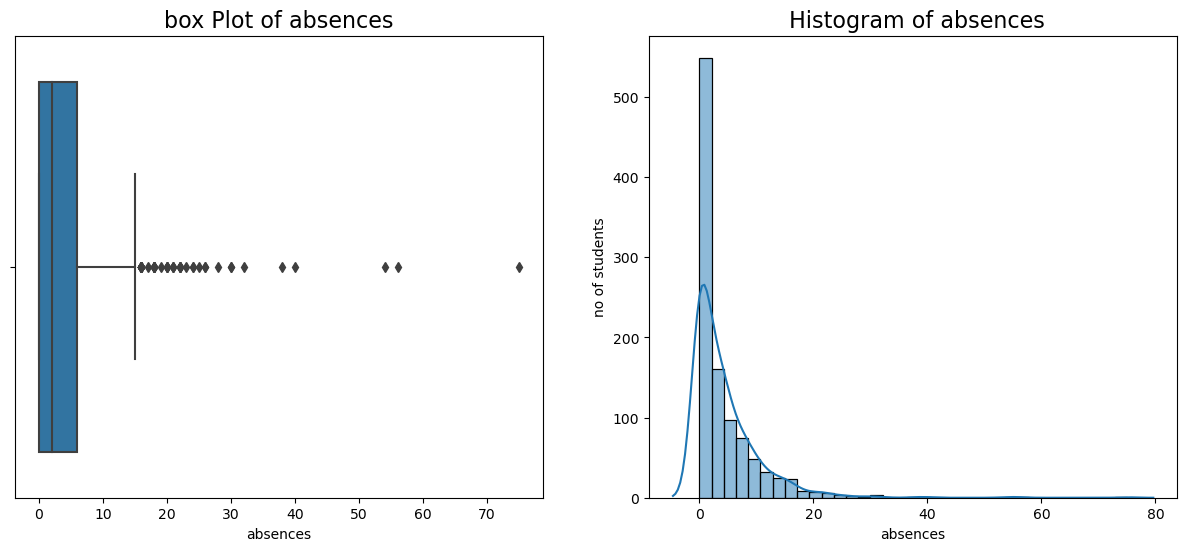

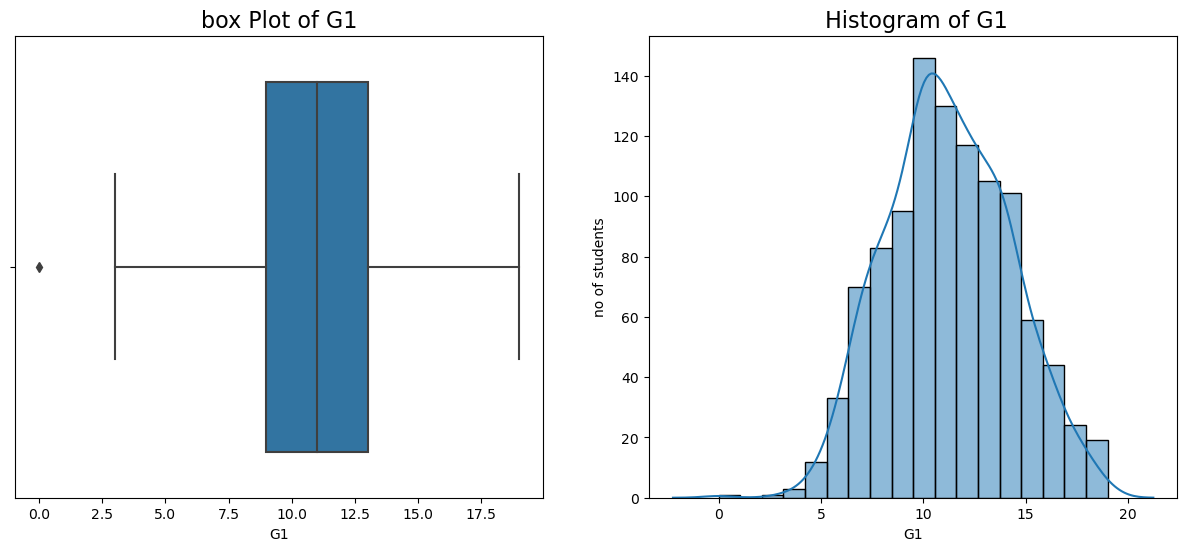

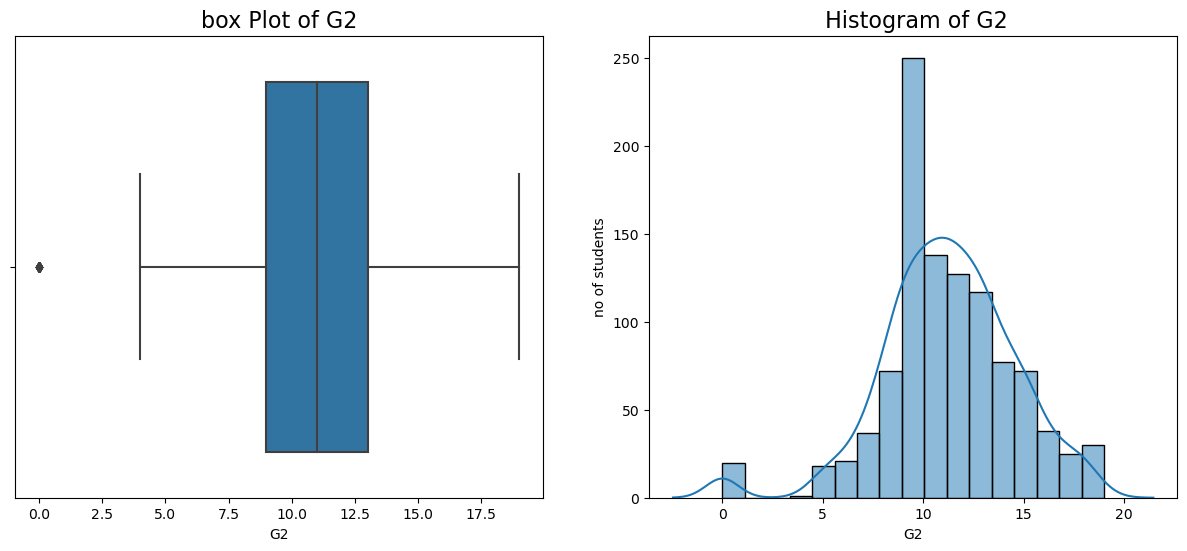

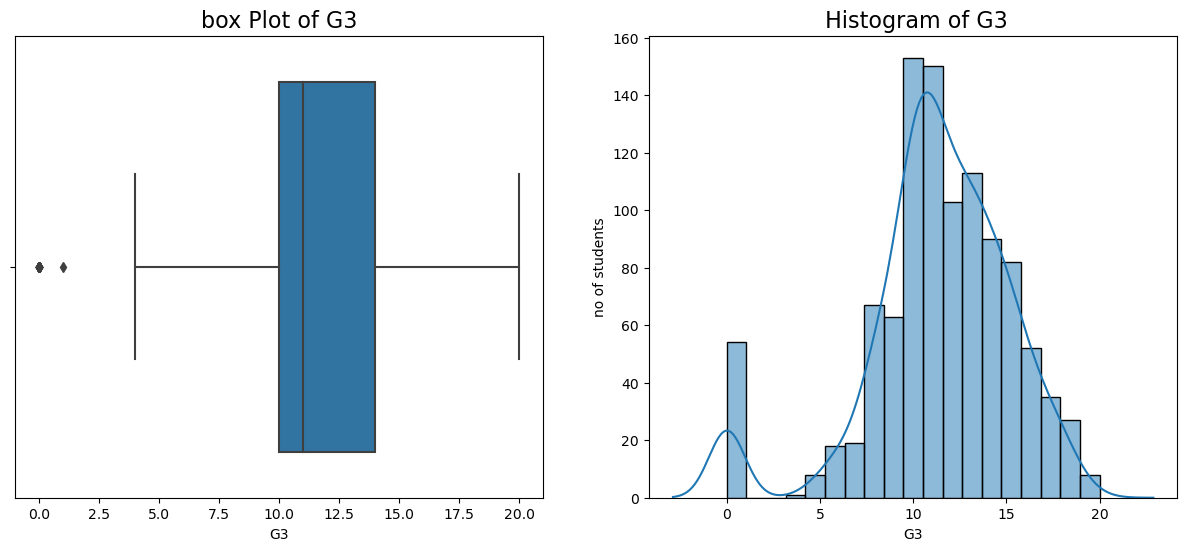

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,16.726750,2.604027,2.388303,1.521572,1.970278,0.264621,3.935762,3.200384,3.154362,1.494727,2.285714,3.542665,4.435283,11.215724,11.247363,11.342282
std,1.240365,1.125291,1.100400,0.730646,0.834753,0.656405,0.933846,1.031705,1.151711,0.912023,1.285105,1.425317,6.212981,2.984037,3.286420,3.866635
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [17]:
boxanddistplot(df)
df.describe()

# outlier capping using IQR method 

In [18]:
unique_counts = df.nunique()
selected_columns = unique_counts[unique_counts >= 6].index.tolist()
for columns1 in selected_columns:
    percentile25 = df[columns1].quantile(0.25)
    percentile75 = df[columns1].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df[columns1] = np.where(
    df[columns1] > upper_limit,upper_limit,np.where(df[columns1] < lower_limit,lower_limit,df[columns1]))
    

# box plot and histogram after outlier capping

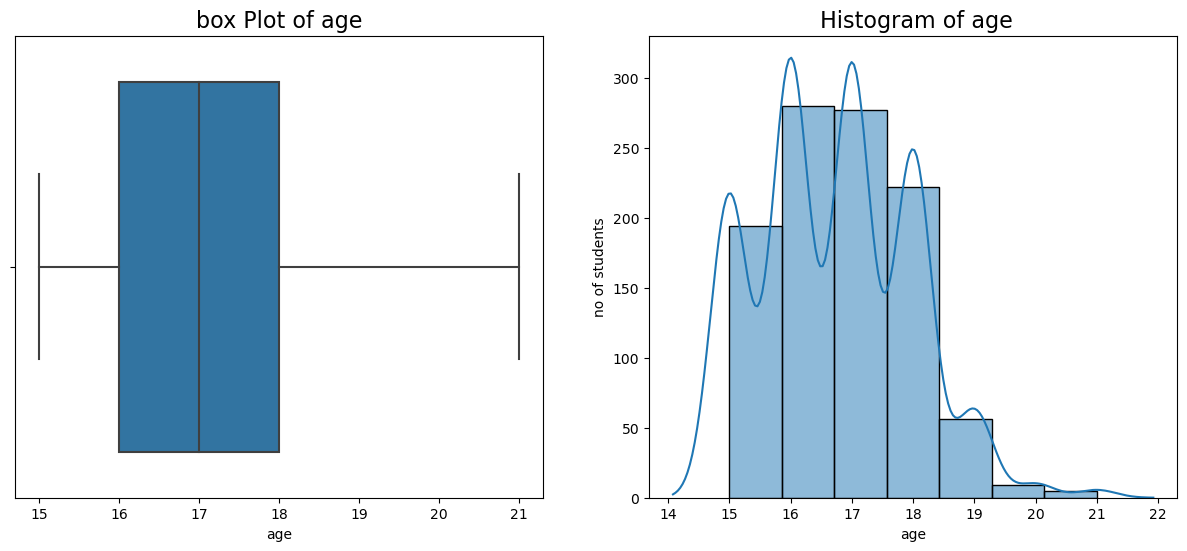

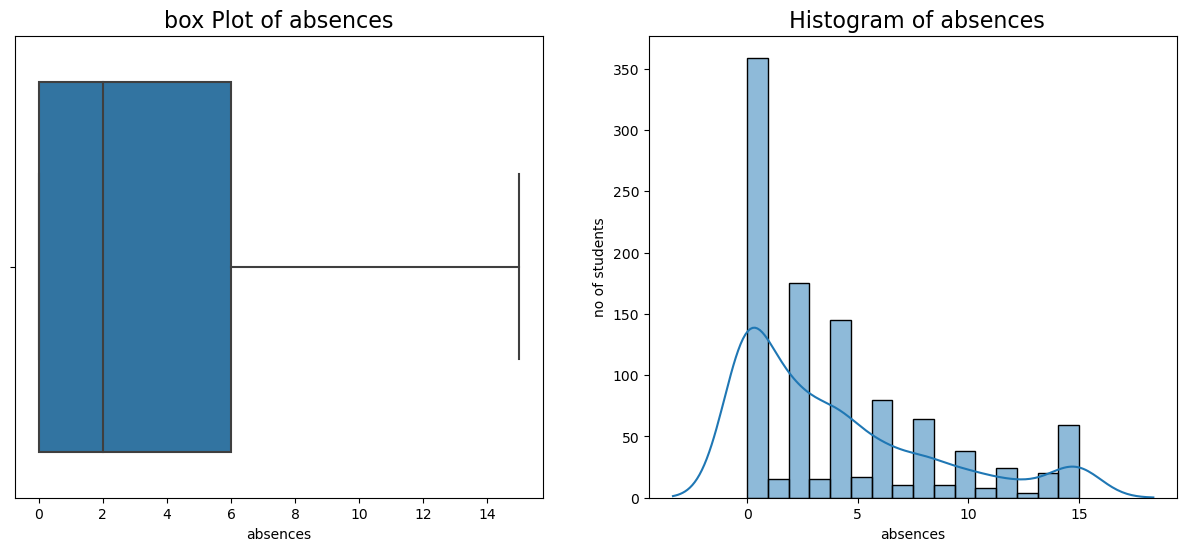

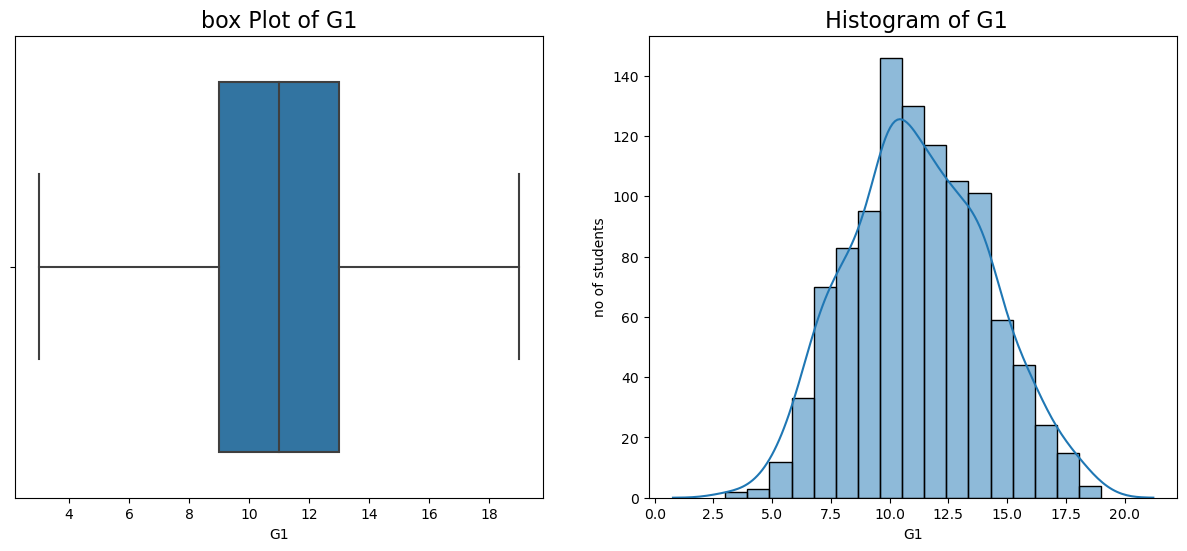

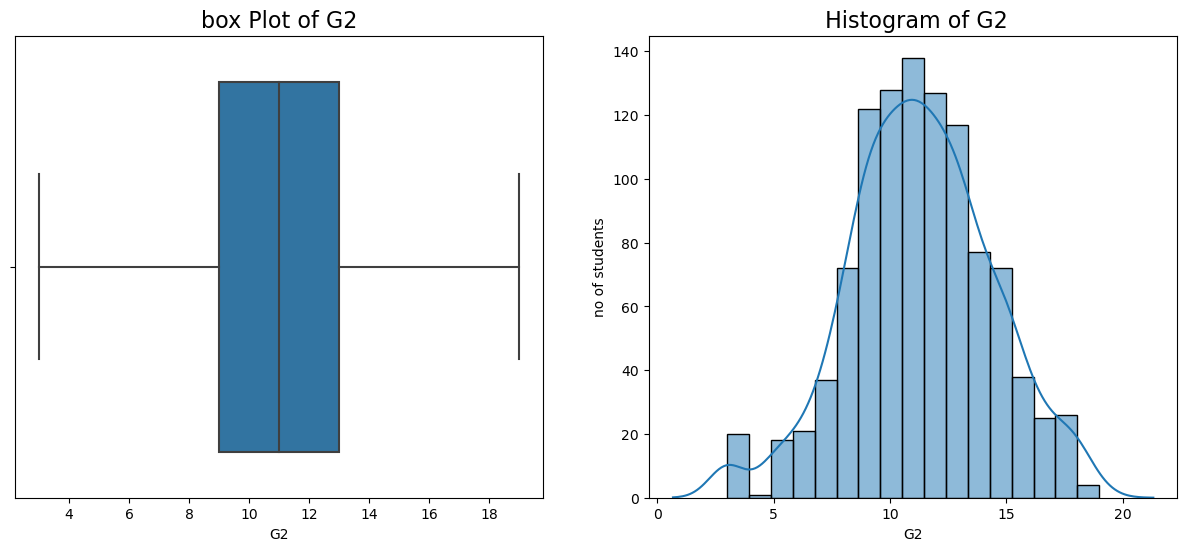

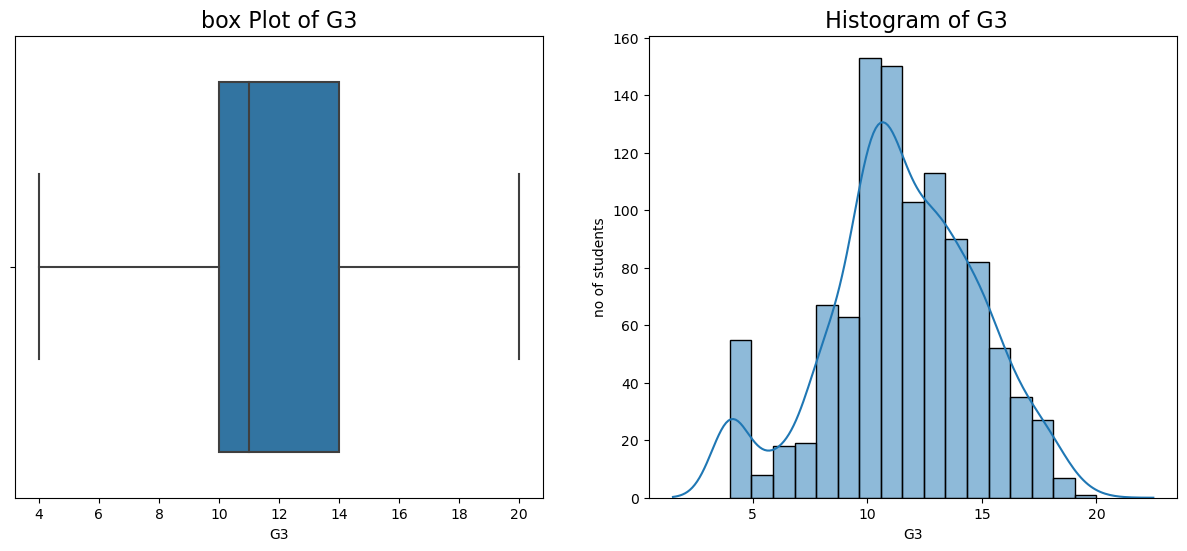

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,16.724832,2.604027,2.388303,1.521572,1.970278,0.264621,3.935762,3.200384,3.154362,1.494727,2.285714,3.542665,4.026846,11.218600,11.304890,11.548418
std,1.232956,1.125291,1.100400,0.730646,0.834753,0.656405,0.933846,1.031705,1.151711,0.912023,1.285105,1.425317,4.494959,2.974646,3.110419,3.325050
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,3.000000,4.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,21.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,15.000000,19.000000,19.000000,20.000000


In [19]:
boxanddistplot(df)
df.describe()

# Function to plot the countplots, piechart and boxplot 
this function plot the countsplot,piechart and boxplot of those columns whose unique values is less then 6 and giving the appropiate title of the each plot 

In [20]:
def plot_categorical_columns(df):
    # Get the list of categorical columns in the DataFrame
    dfcopy=df.copy(deep=True)
    dfcopy.columns= ["school","sex","age", "home address type","family size","parent's cohabitation status","mother's education",\
"father's education","mother's job","father's job","reason to choose this school","student's guardian",\
"home to school travel time","weekly study time","number of past class failures","extra educational support",\
"family educational support","extra paid classes within the course subject","extra-curricular activities",\
"attended nursery school","wants to take higher education","Internet access at home", "with a romantic relationship",\
"quality of family relationships","free time after school","going out with friends","workday alcohol consumption",\
"weekend alcohol consumption","current health status","number of school absences","first period grade", "second period grade","final grade","subject of course"]
    unique_counts = dfcopy.nunique()
    selected_columns = unique_counts[unique_counts <= 6].index.tolist()

    # Iterate over each categorical column and plot countplot and pie chart
    for column_name  in  selected_columns:
        plot_allplot(dfcopy, column_name,xlabel=column_name)
        plt.figure(figsize=(15, 5))
        sns.boxplot(x=column_name, y='final grade', data=dfcopy)
        plt.title(f"box Plot of final grade Variable by {column_name}",fontsize=16,loc='center')
        plt.xlabel(f"{column_name}")
        plt.ylabel('final grades')
        plt.show()
    

In [21]:
def plot_allplot(df, column_name,xlabel=None,ylabel="No of students",title=None):
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return
    
    fig=plt.figure(figsize=(15, 5))
    if title is None:
        title=f"Distribution of Students according to {column_name}"
        fig.suptitle(title,fontsize=19)
    else:
        fig.suptitle(title,fontsize=20)
    plt.subplot(1, 2, 1)
    df[column_name].astype('category')
    order = df[column_name].value_counts().index
    ax=sns.countplot(x=column_name, data=df,order=order,palette="viridis")
    if xlabel is not None:
        plt.xlabel(xlabel,fontsize=10)
    if ylabel is not None:
        plt.ylabel(ylabel,fontsize=10)
    handles, labels = [], []
    for i, category in enumerate(order):
        count = df[column_name].value_counts()[category]
        handles.append(plt.Line2D([0], [0], marker='o', color=sns.color_palette("viridis")[i], markersize=8))
        labels.append(f'{category} ({count})')
    plt.legend(handles, labels, title=f'{column_name} categories', loc='center left', bbox_to_anchor=(1, 0.1))
    plt.subplot(1, 2, 2)
    category_counts = df[column_name].value_counts()    
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=0)
    plt.legend(category_counts.index, title=f'{column_name} categories', loc='center left', bbox_to_anchor=(1, 0.1))
    plt.tight_layout()
    plt.show() 

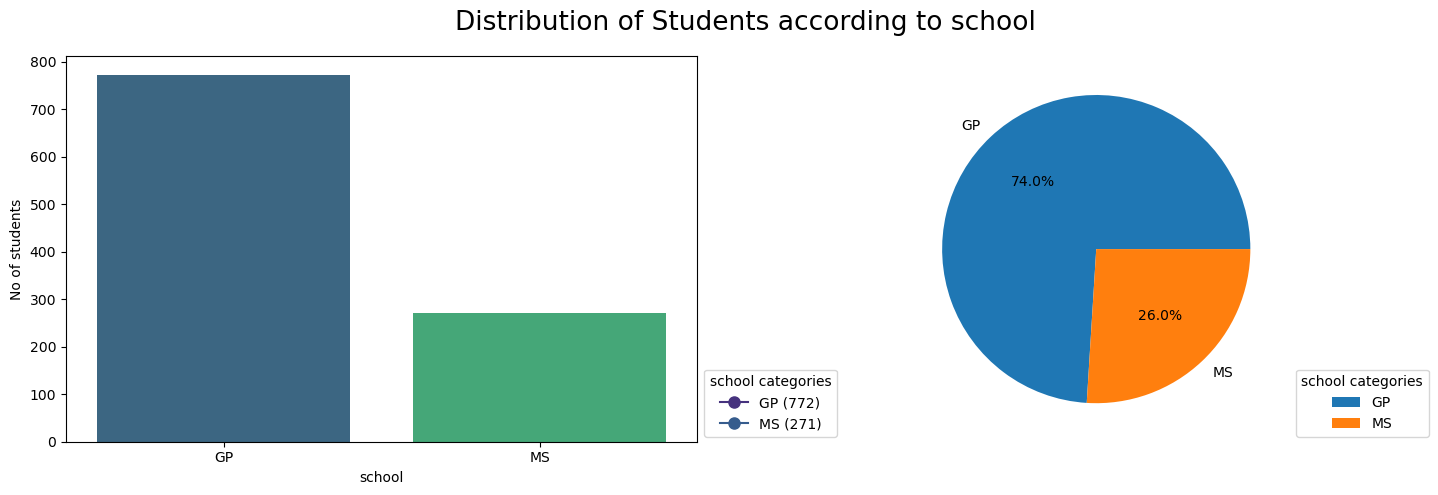

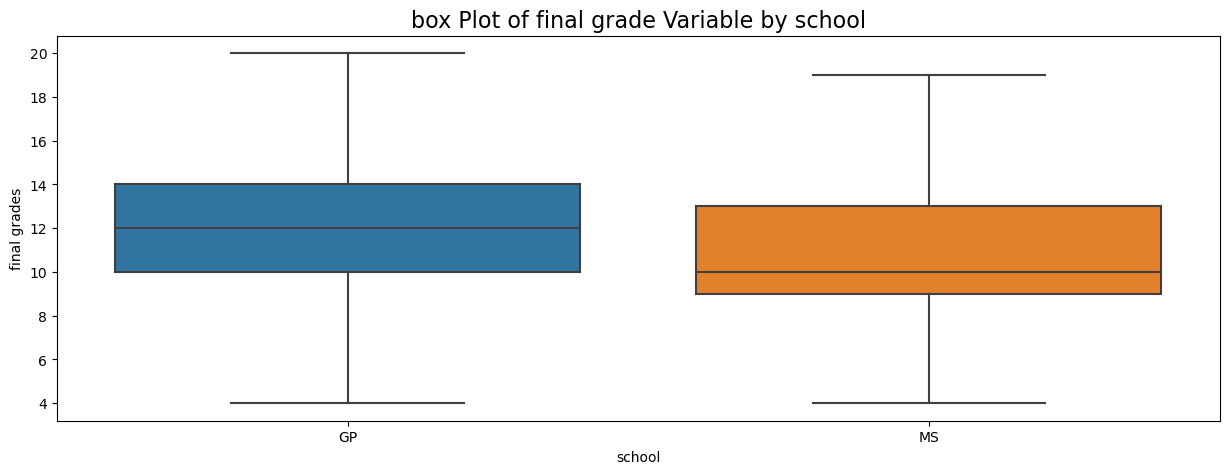

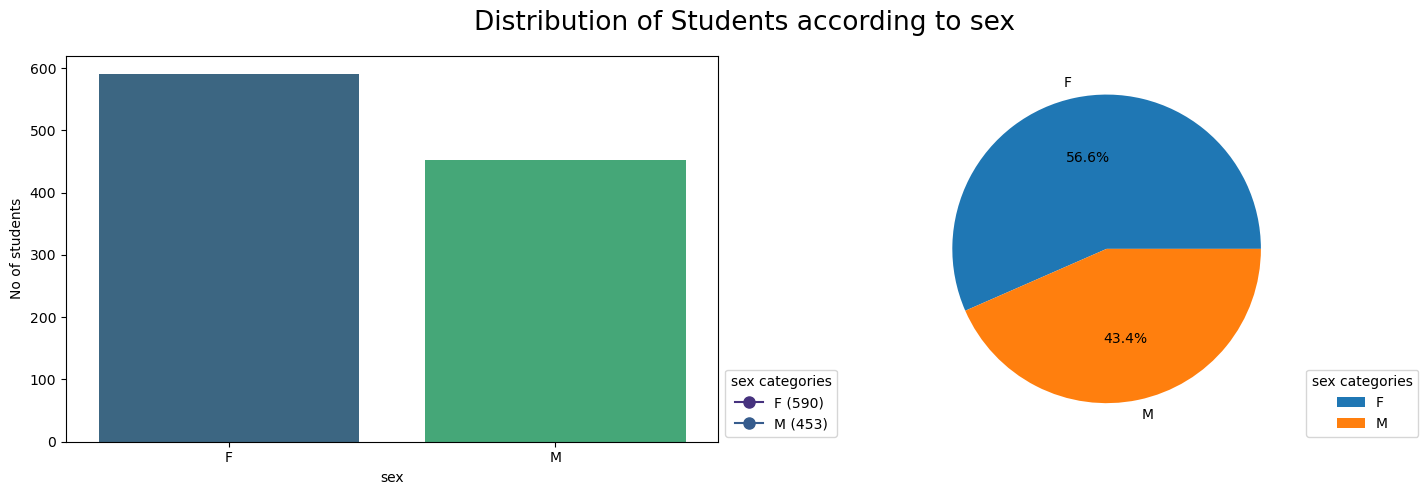

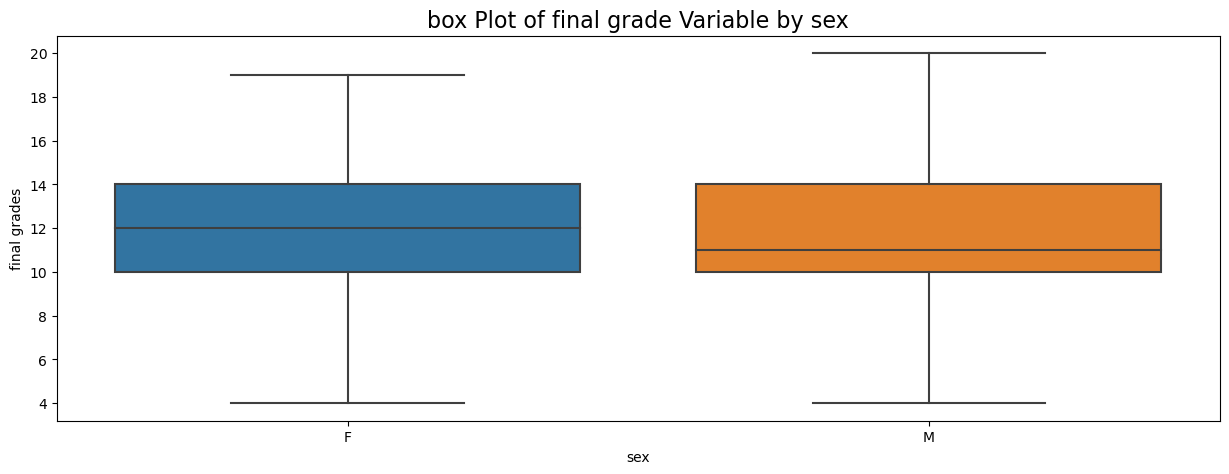

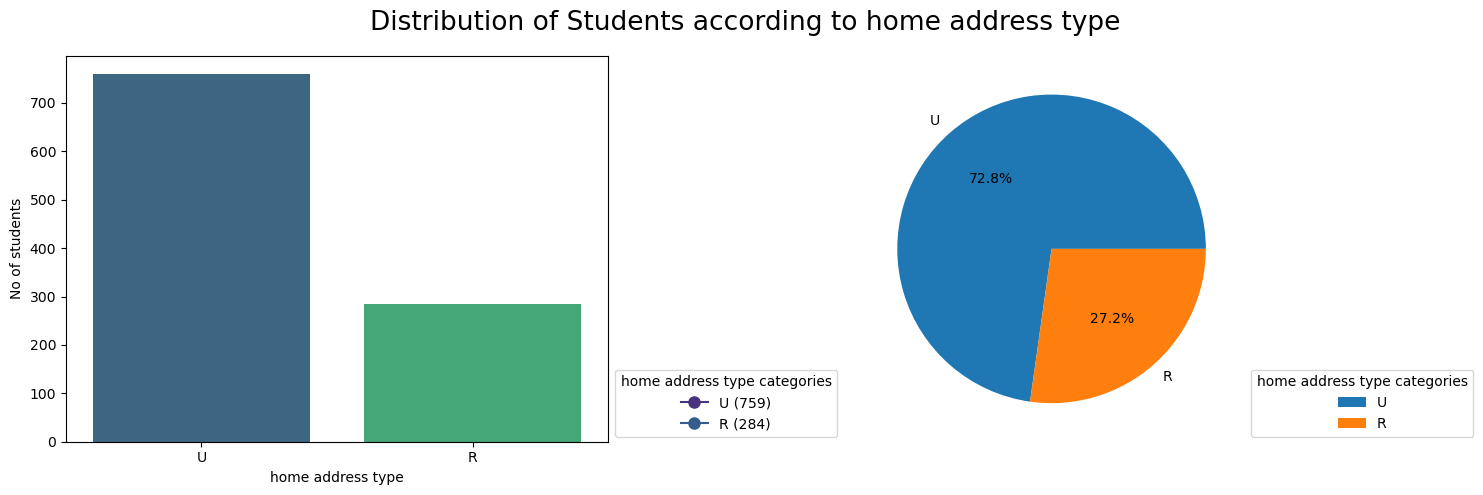

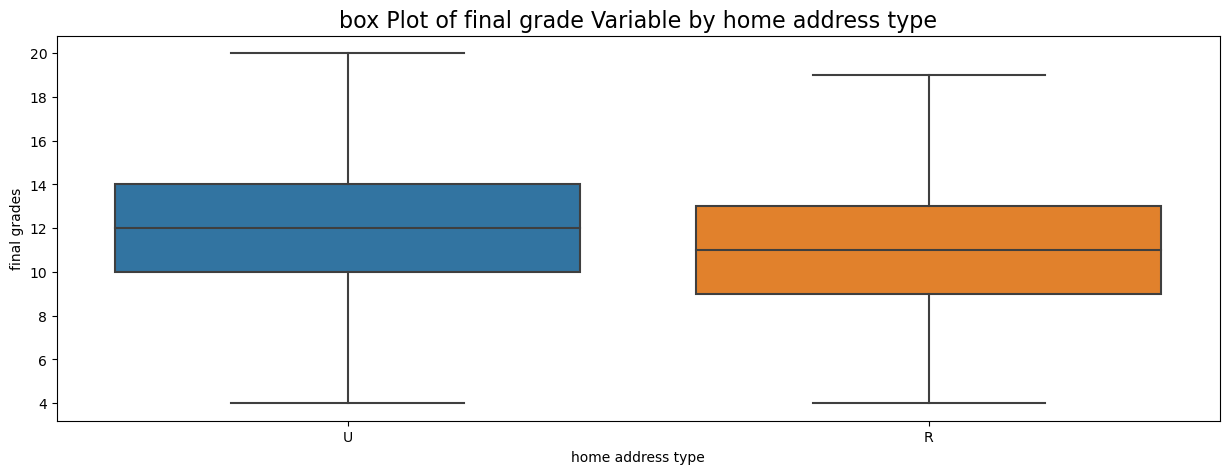

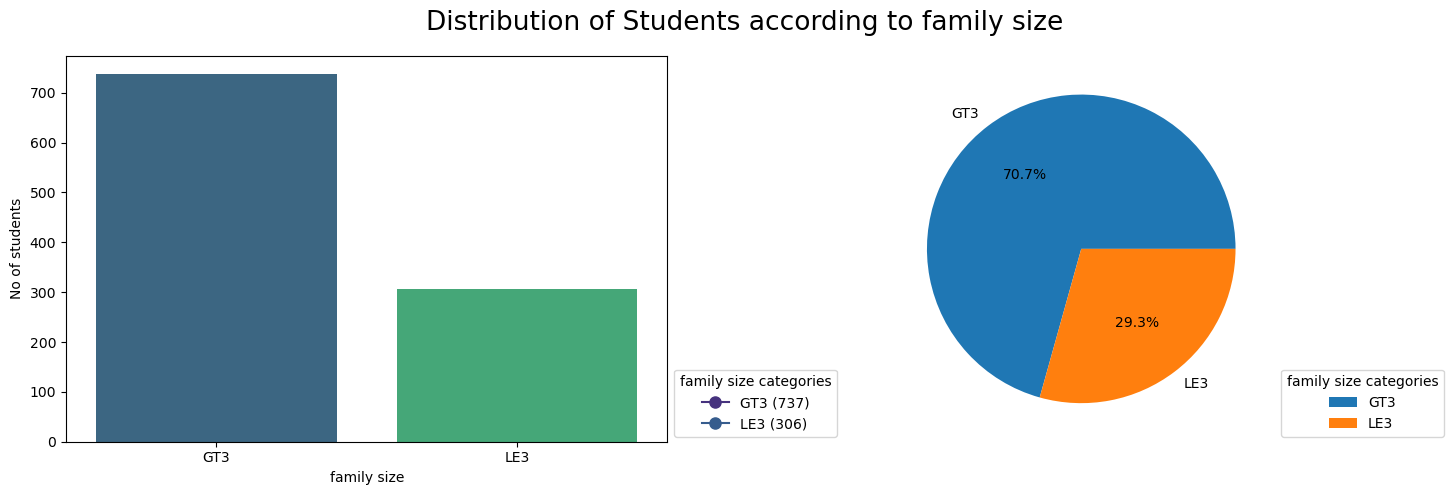

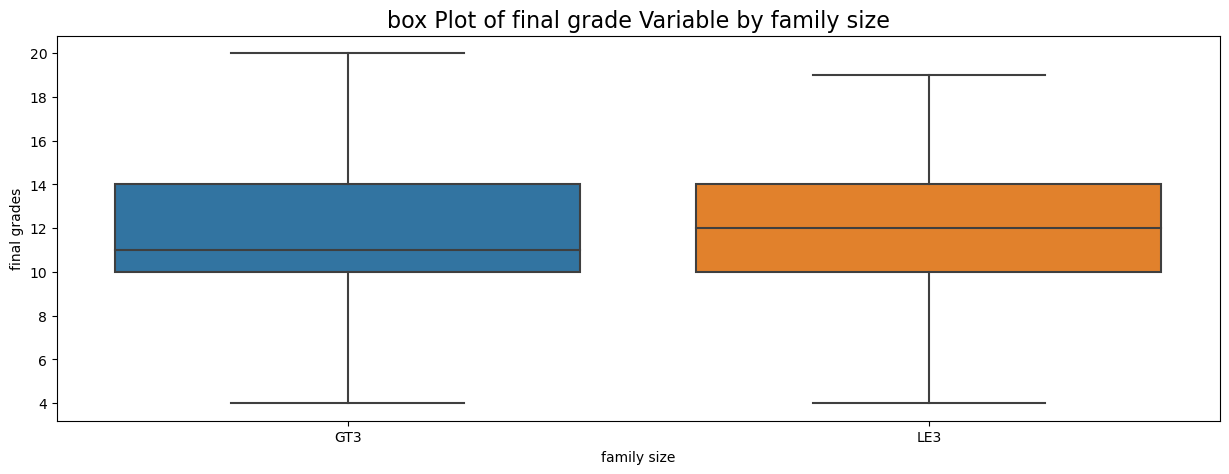

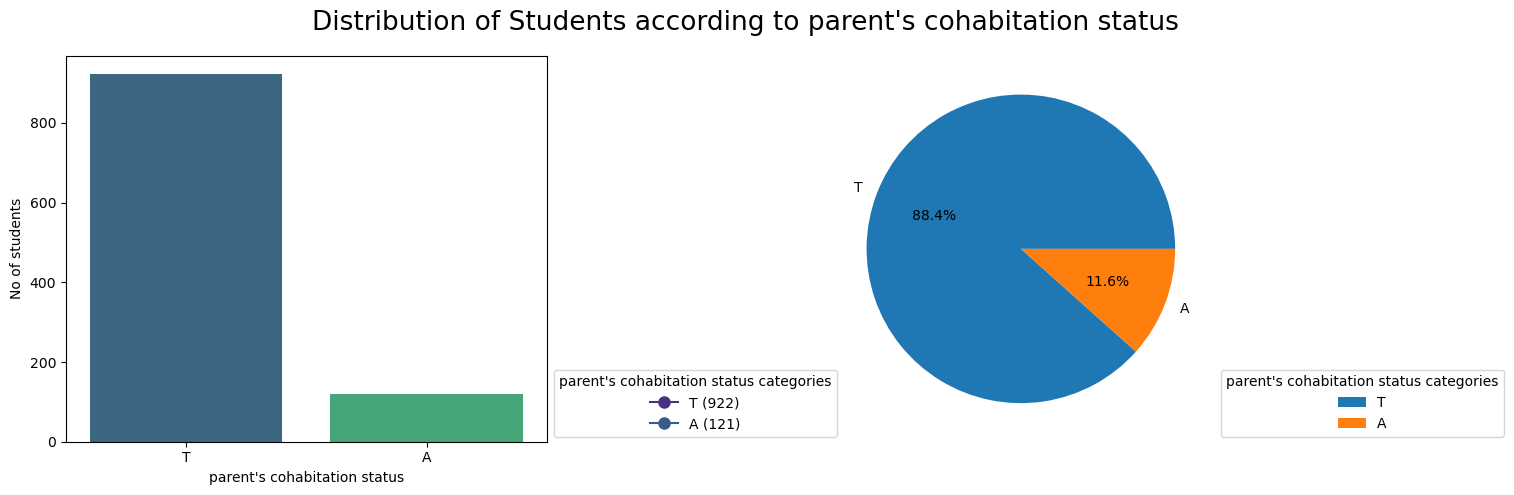

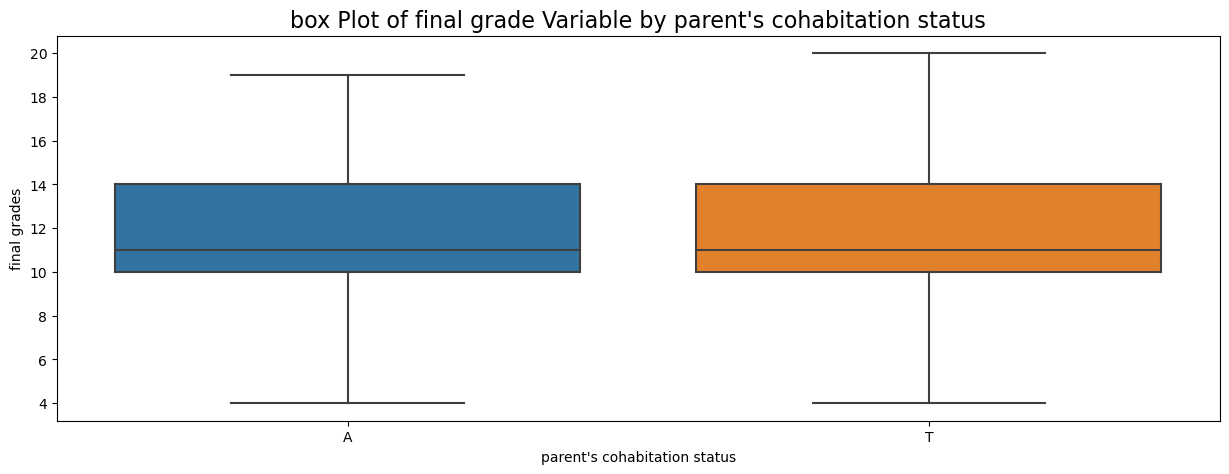

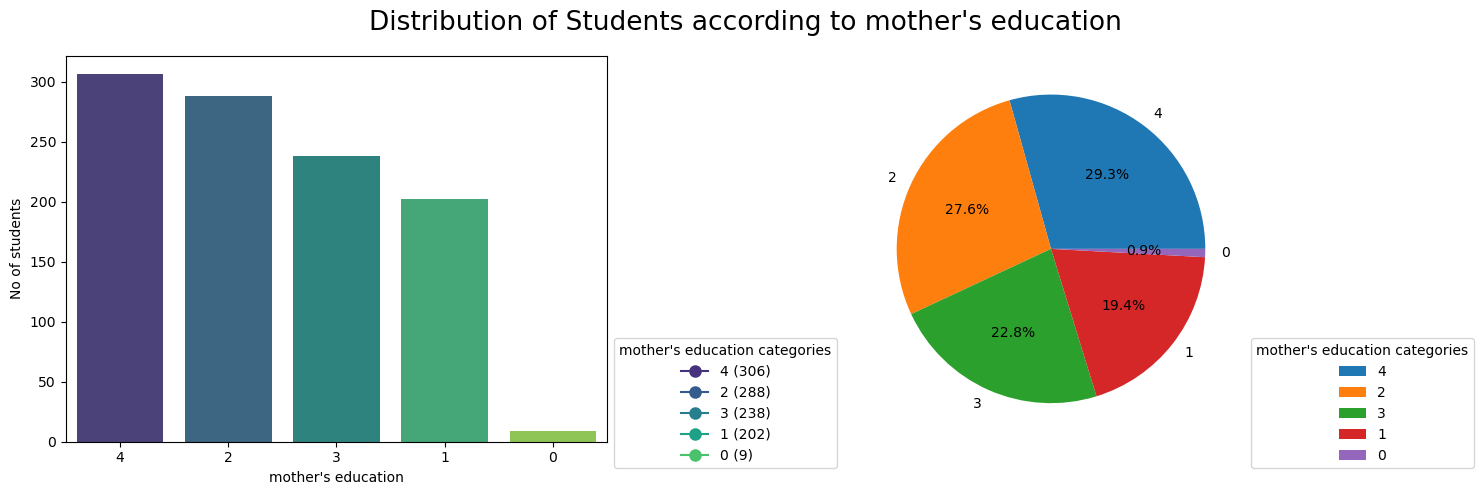

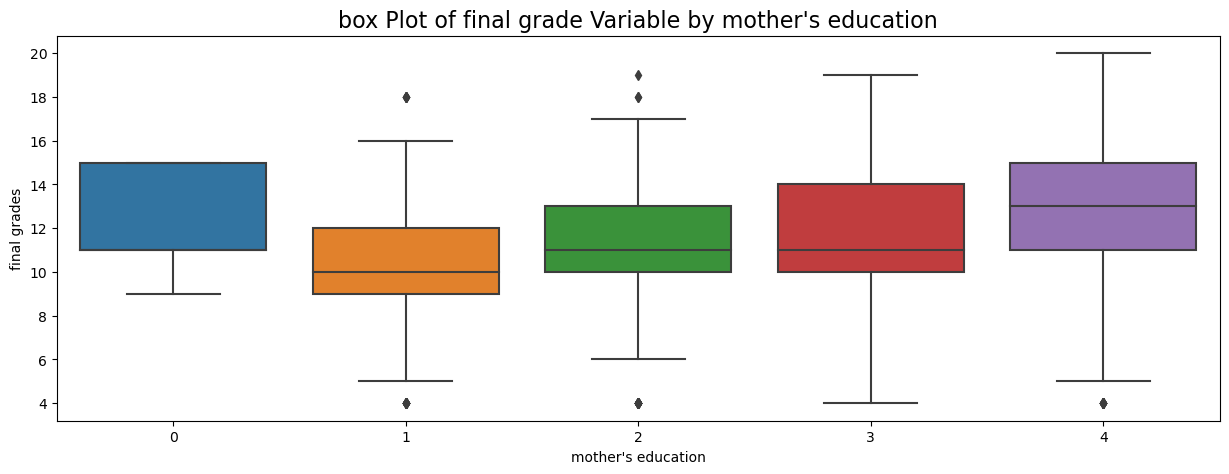

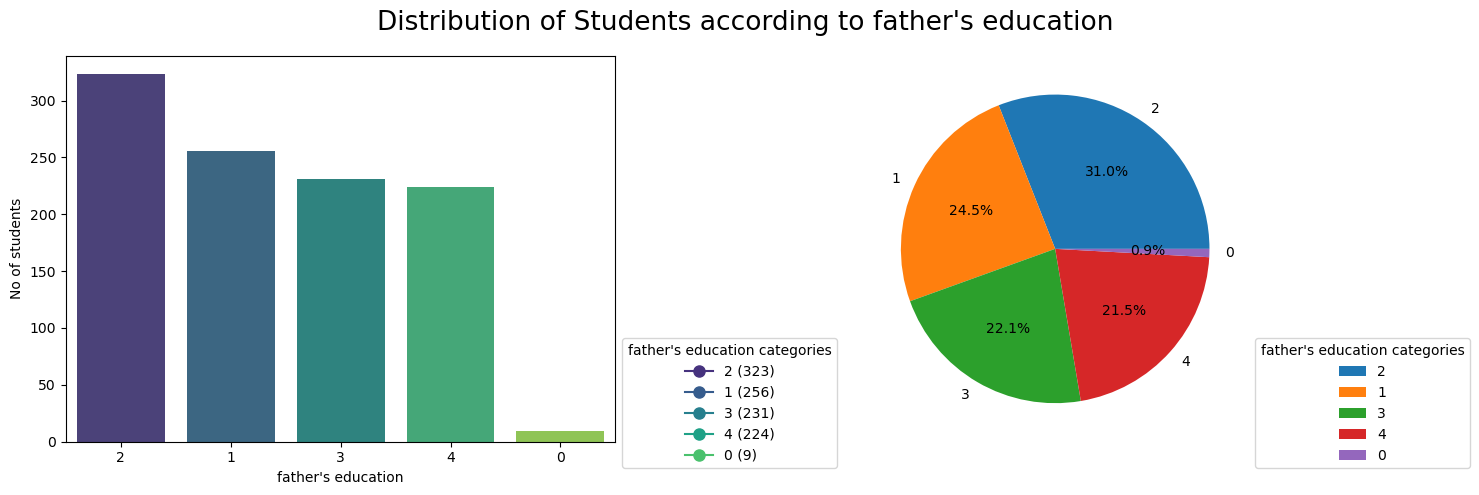

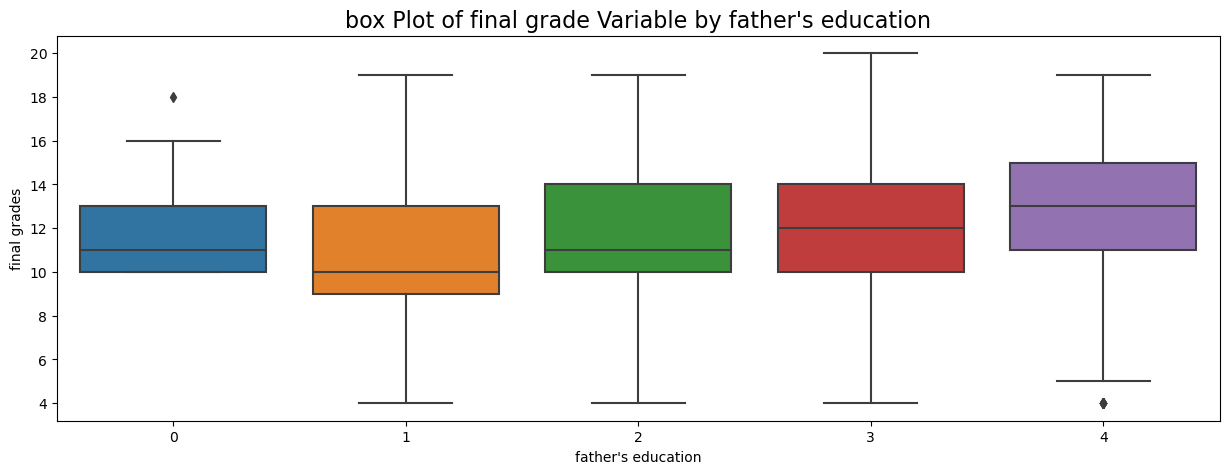

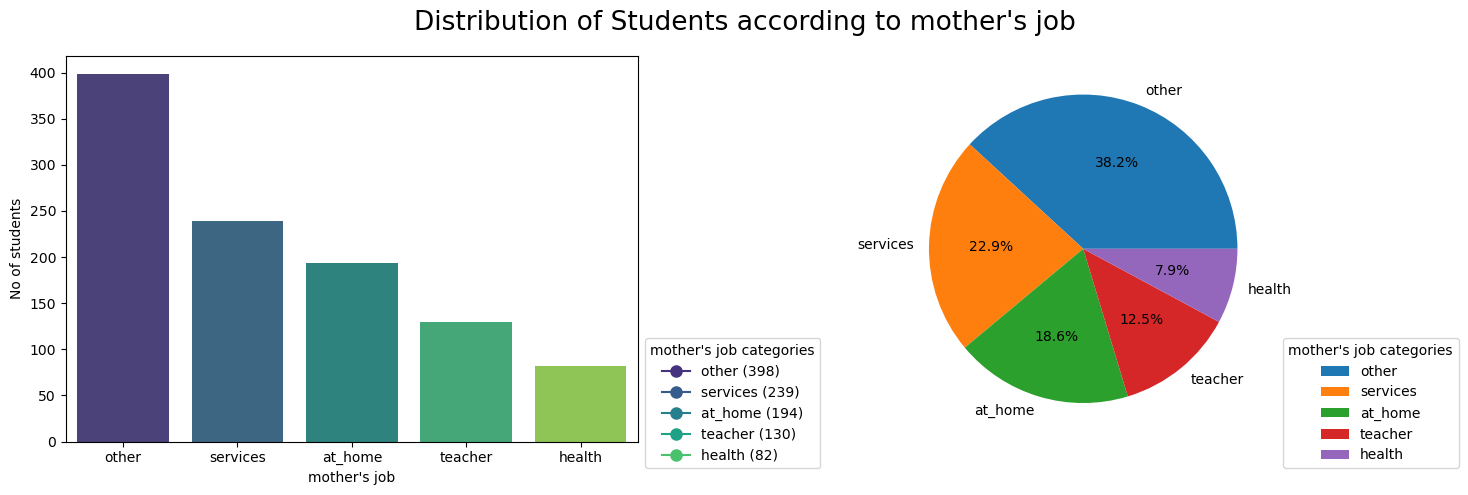

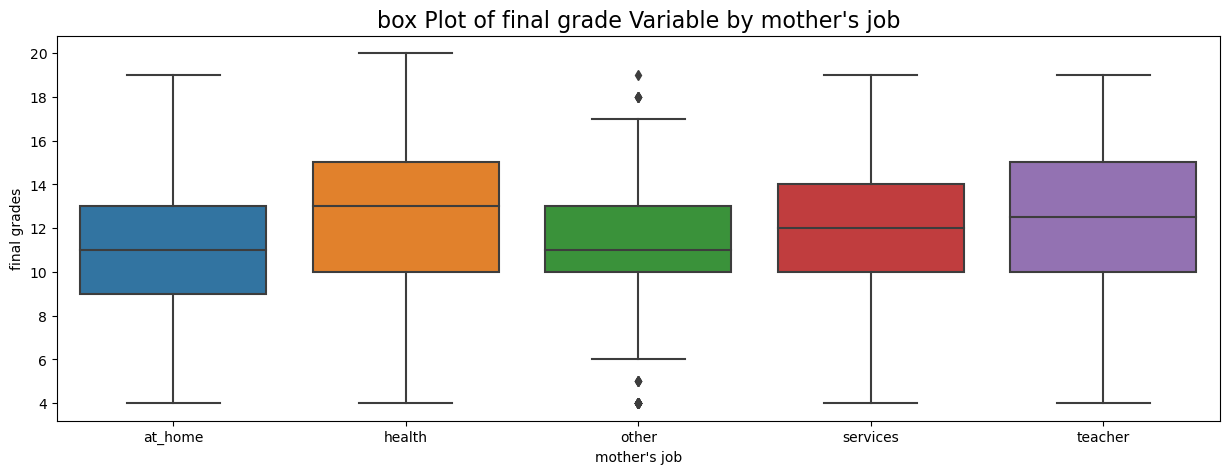

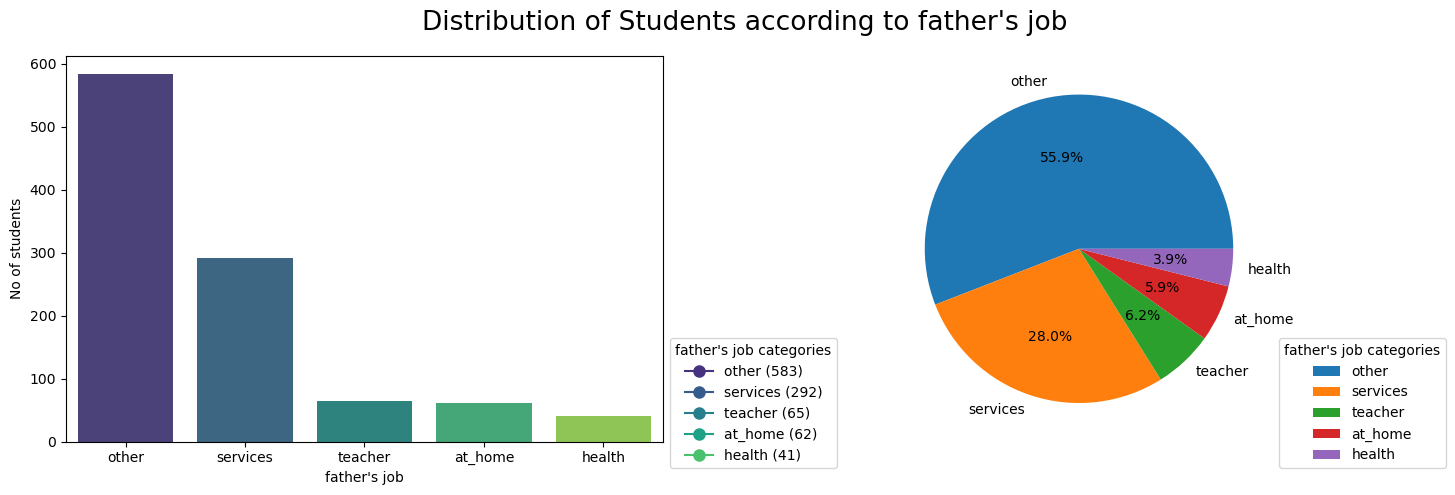

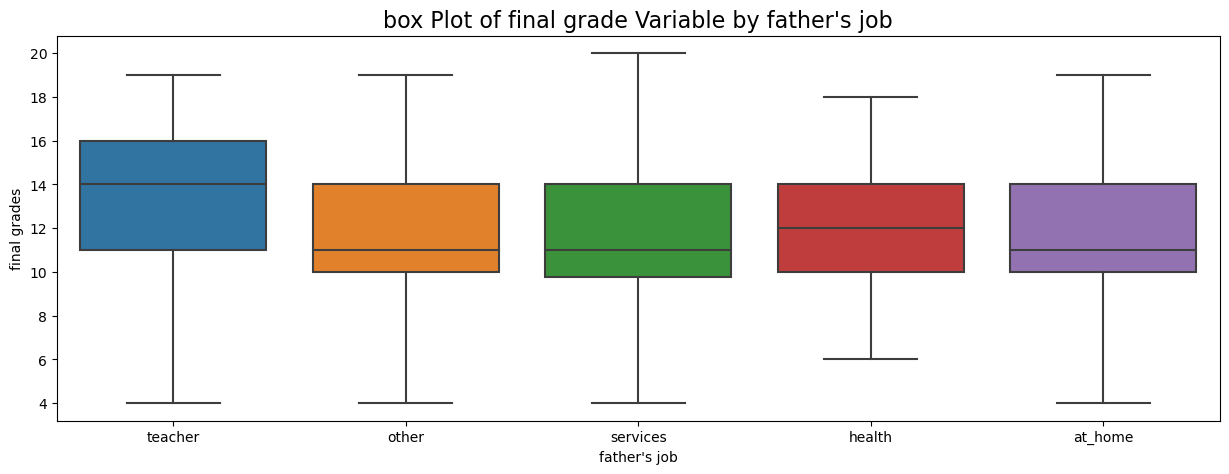

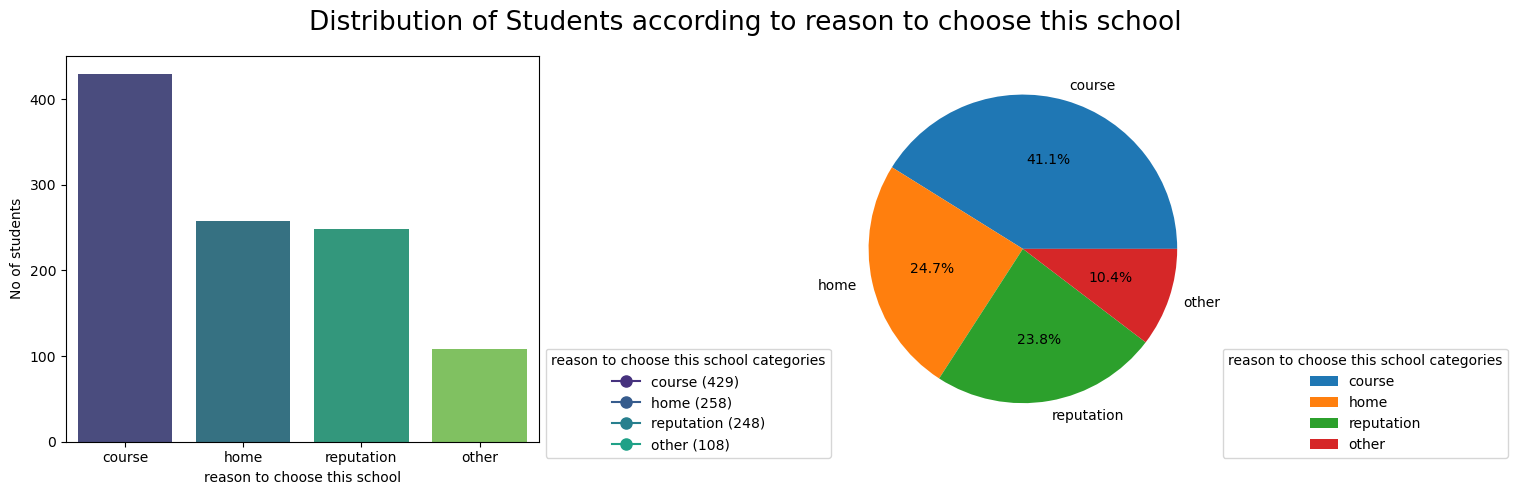

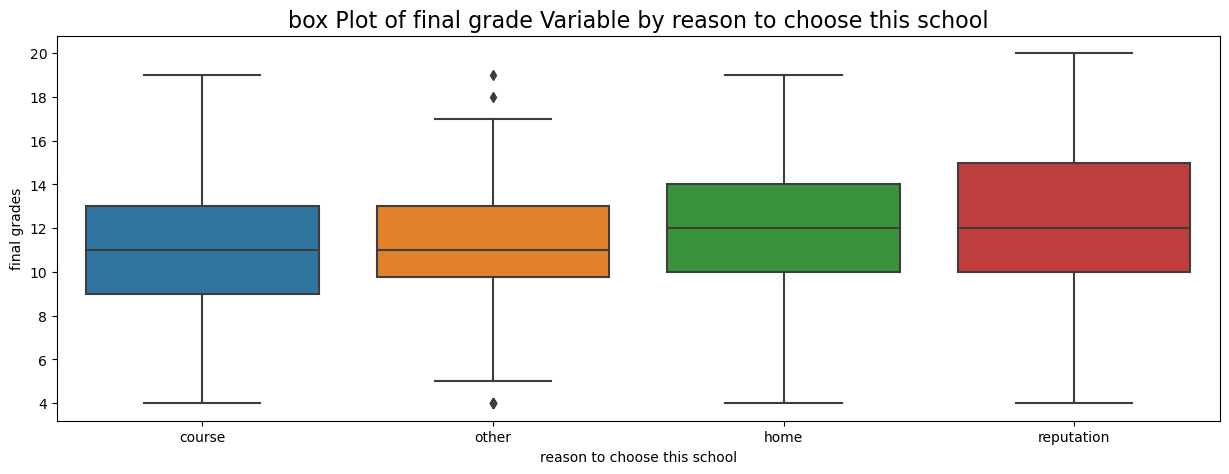

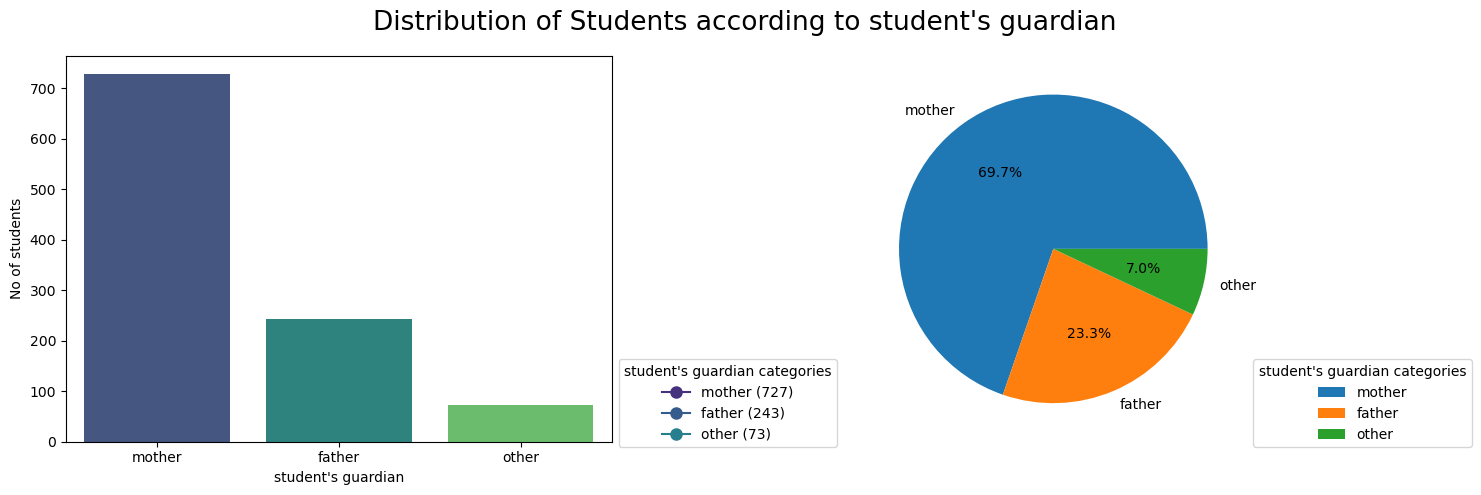

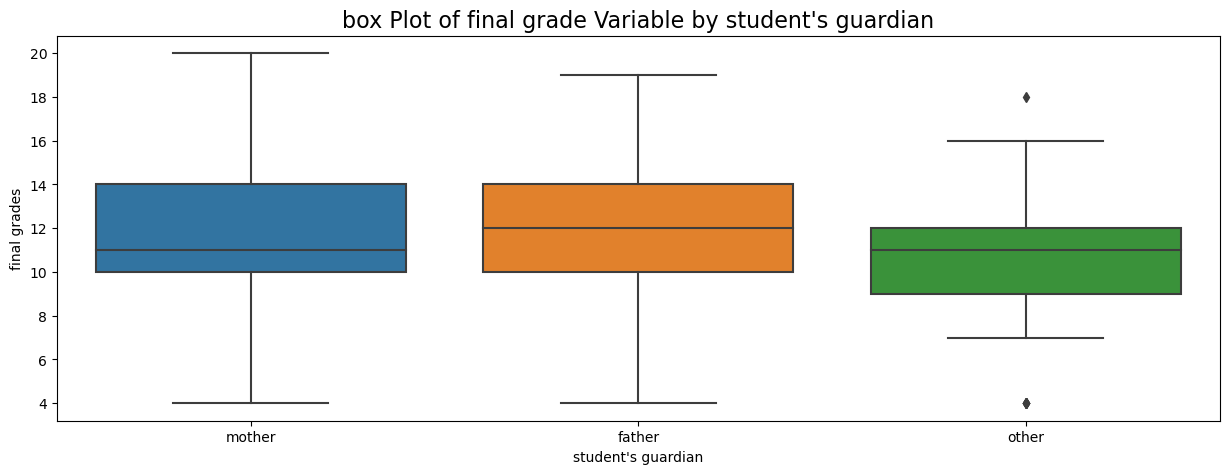

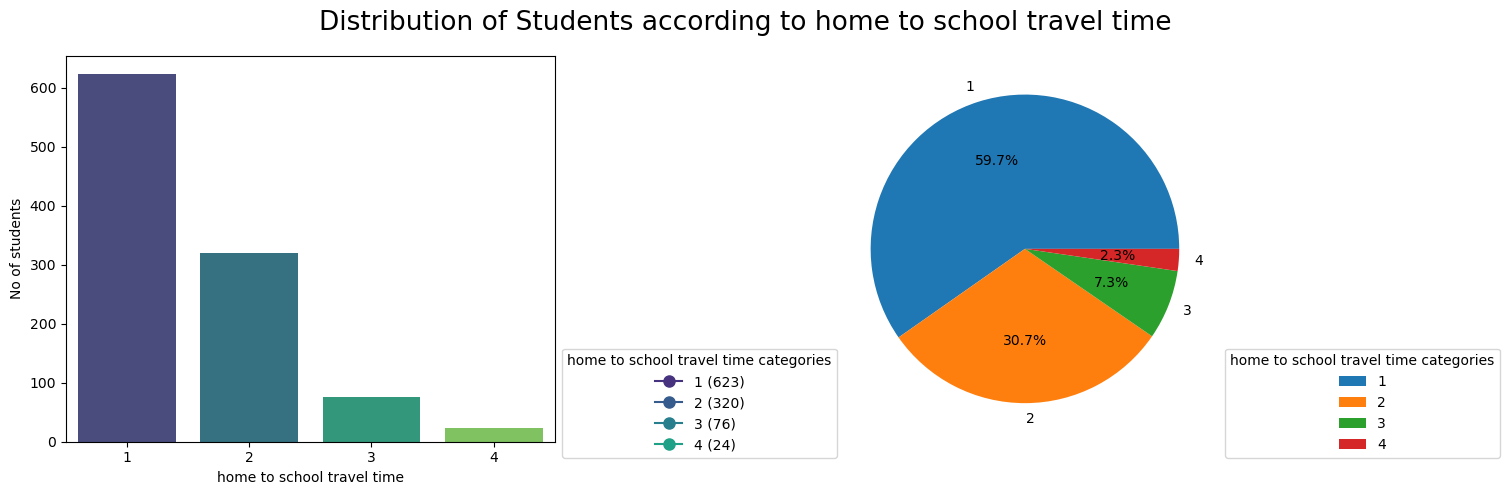

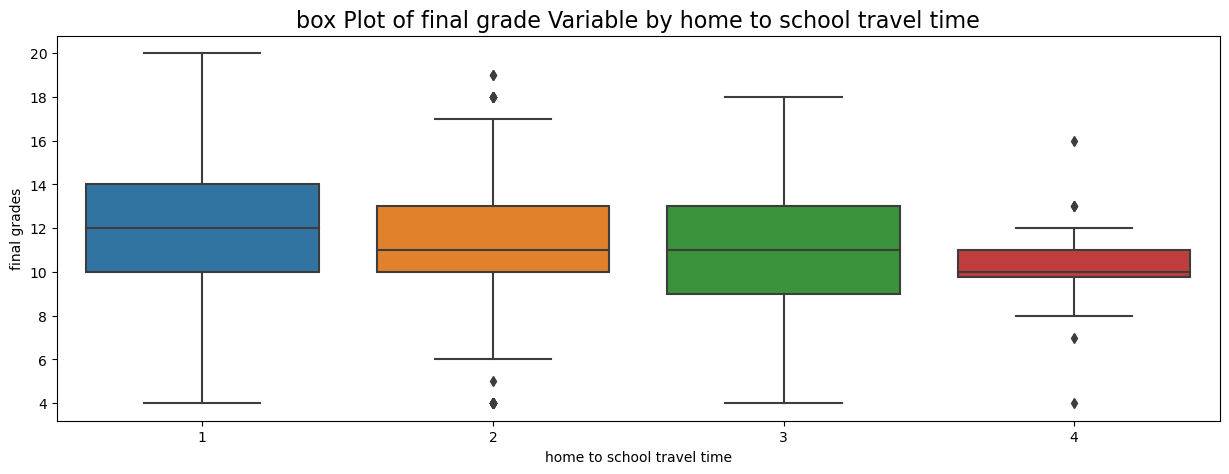

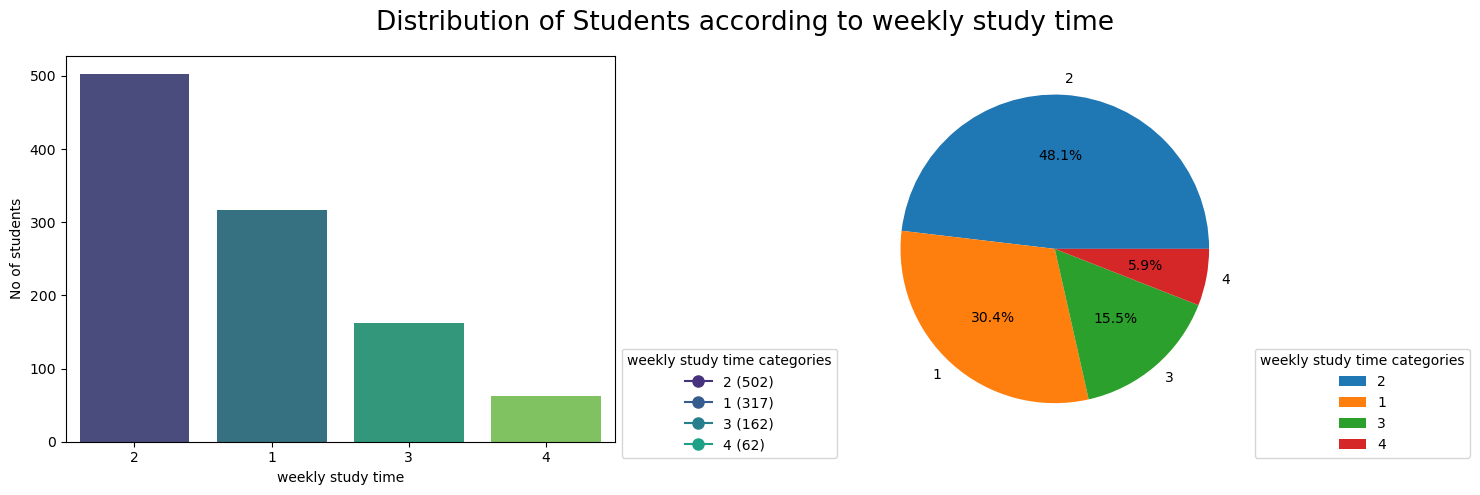

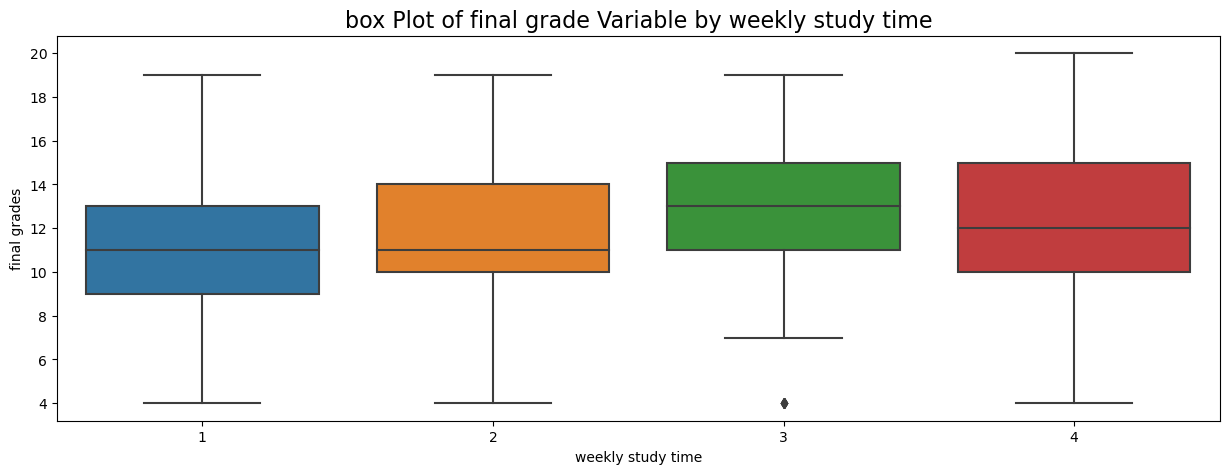

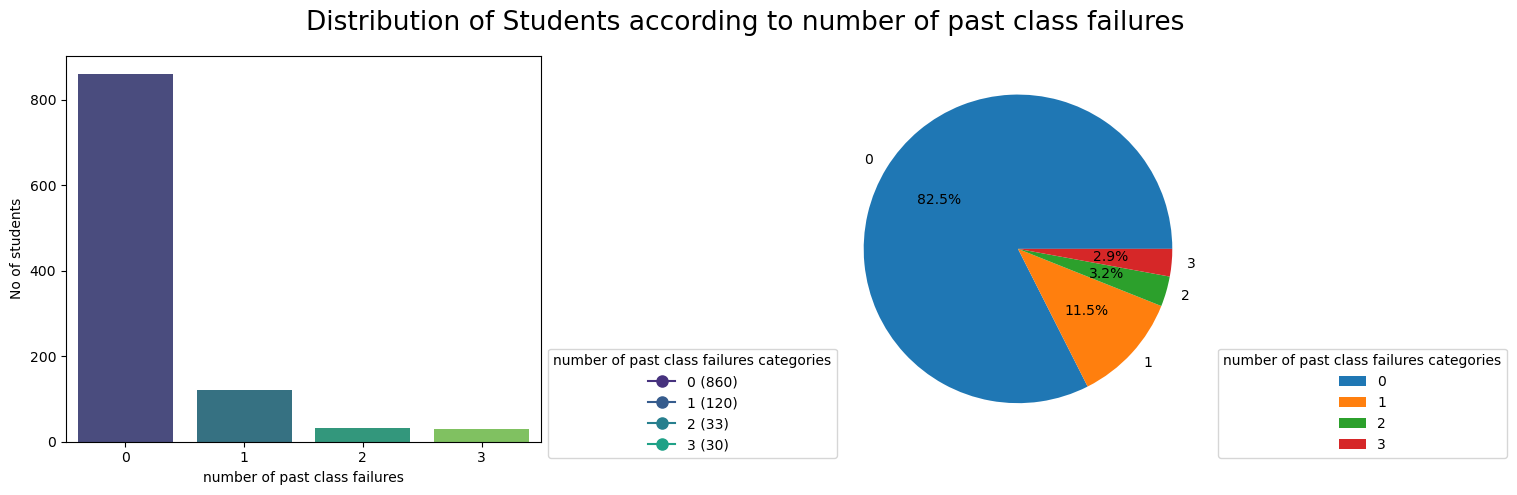

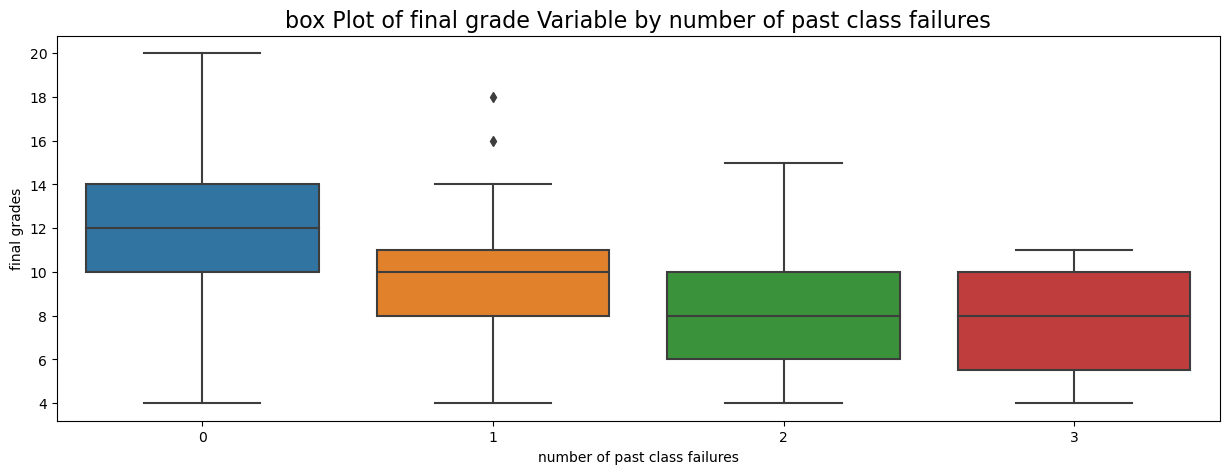

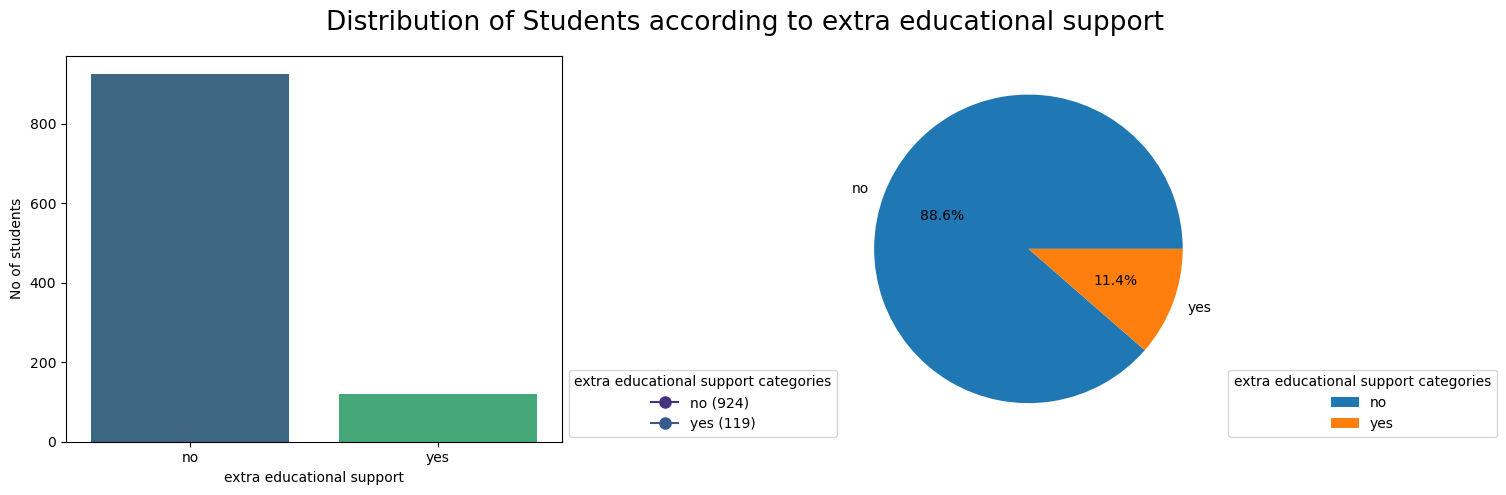

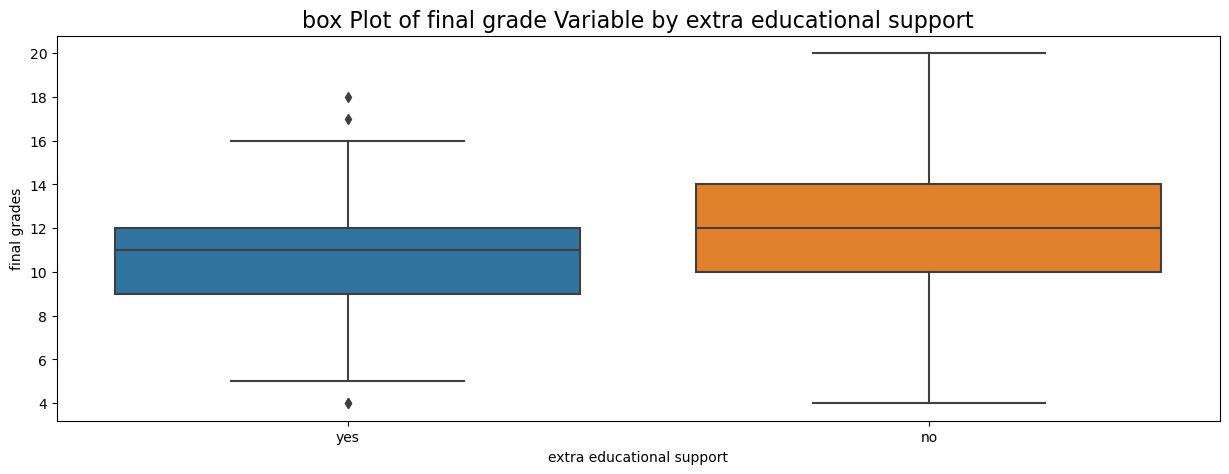

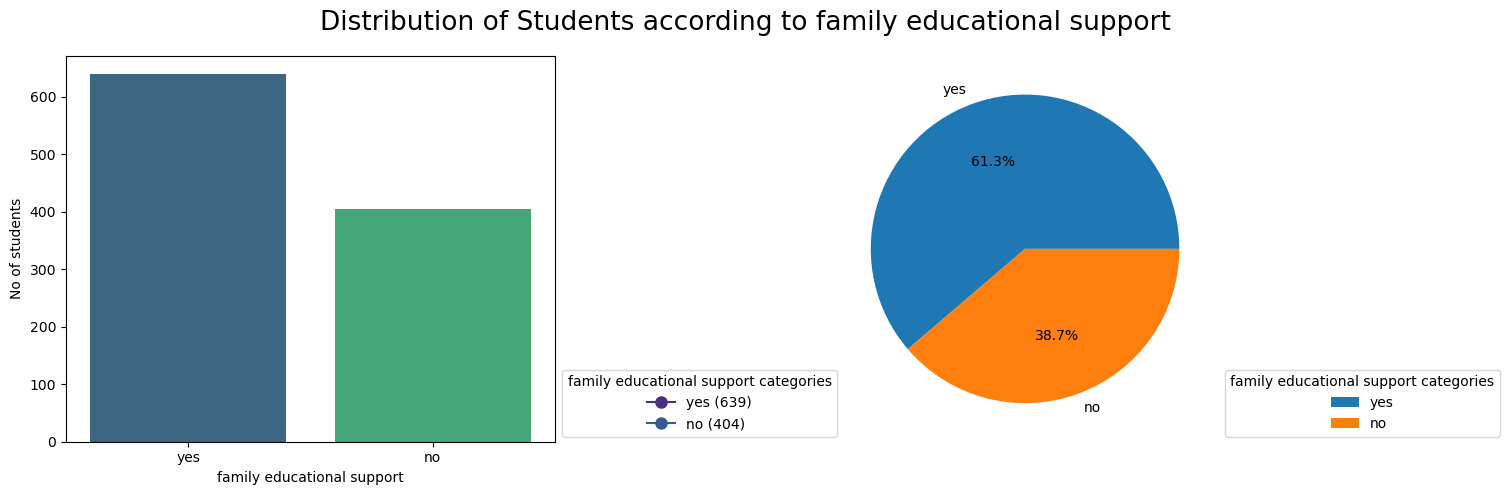

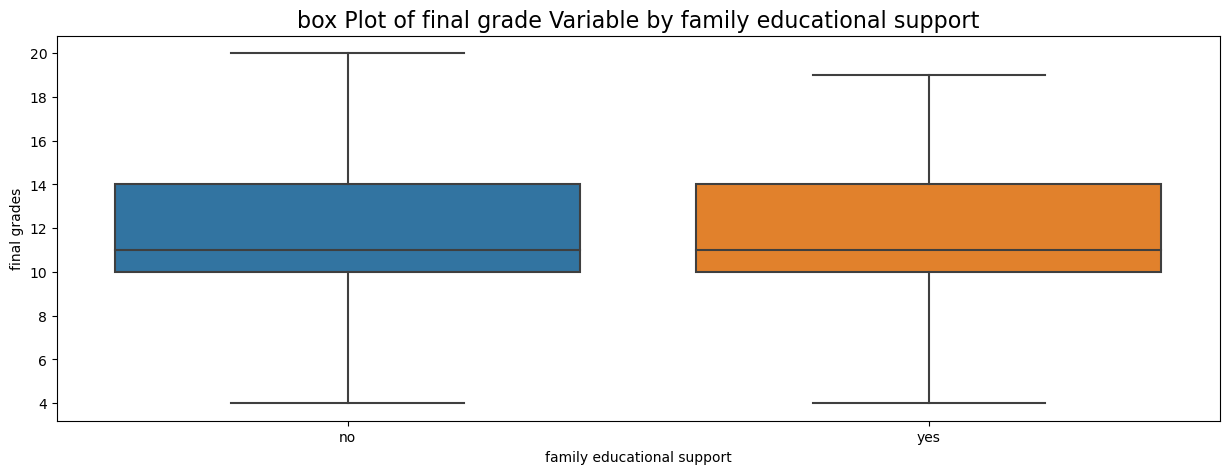

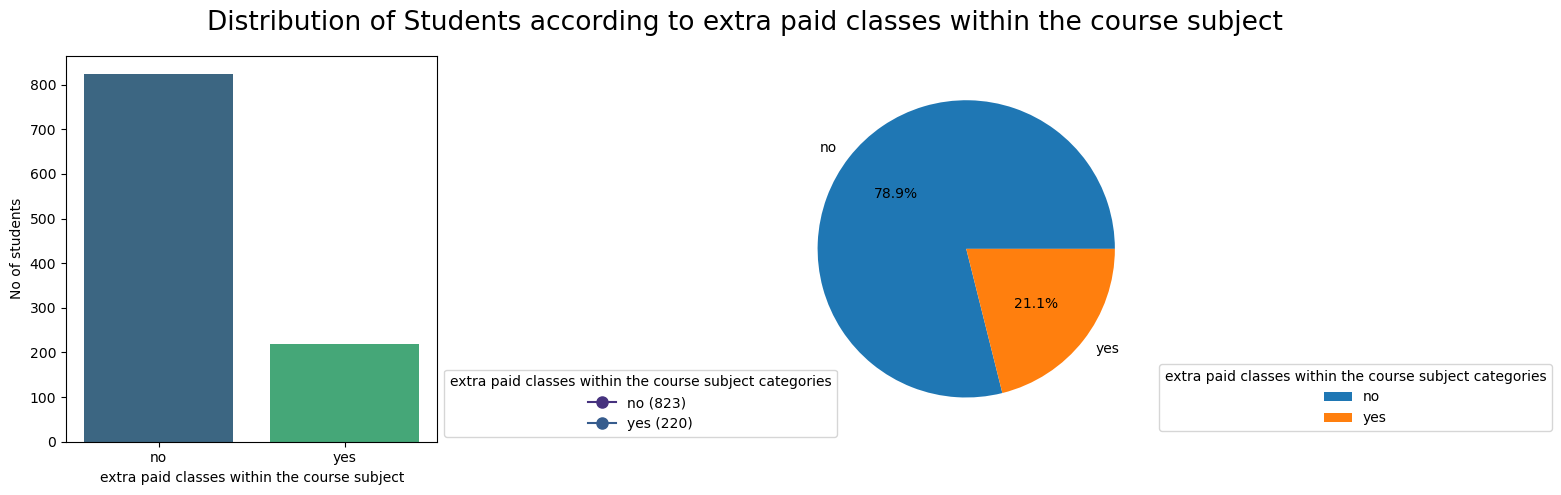

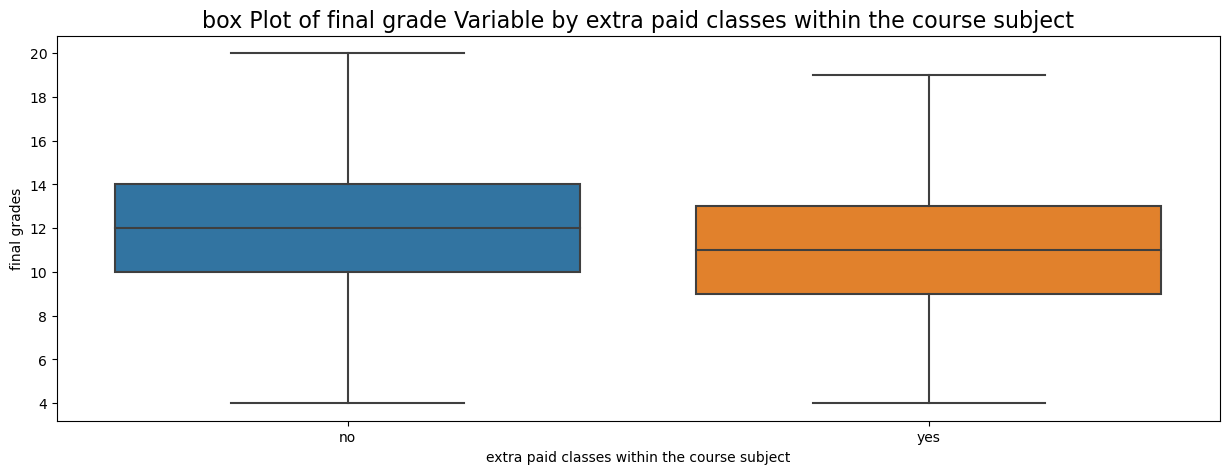

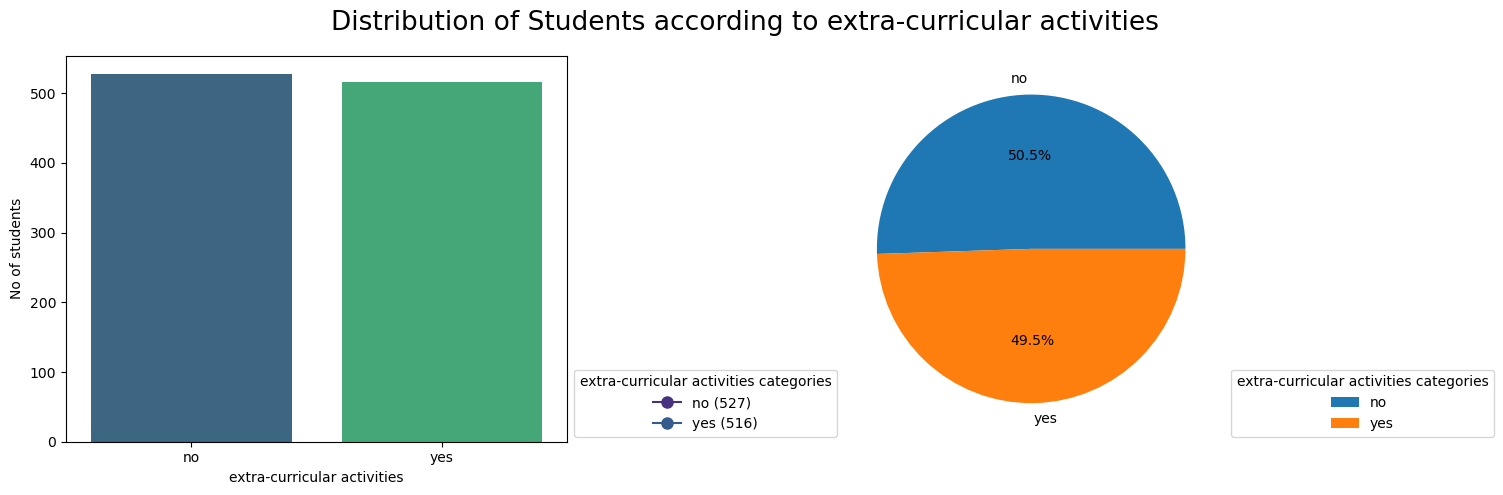

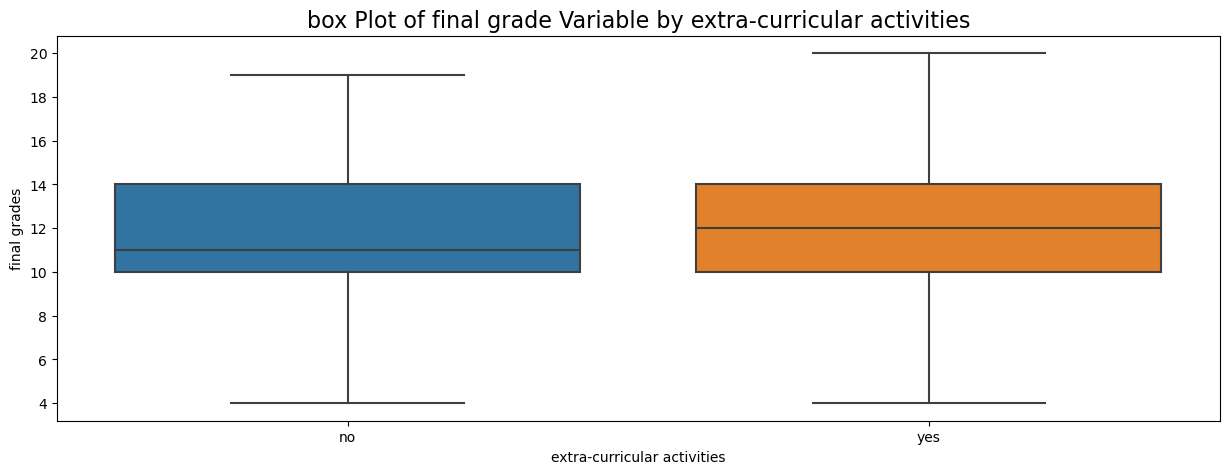

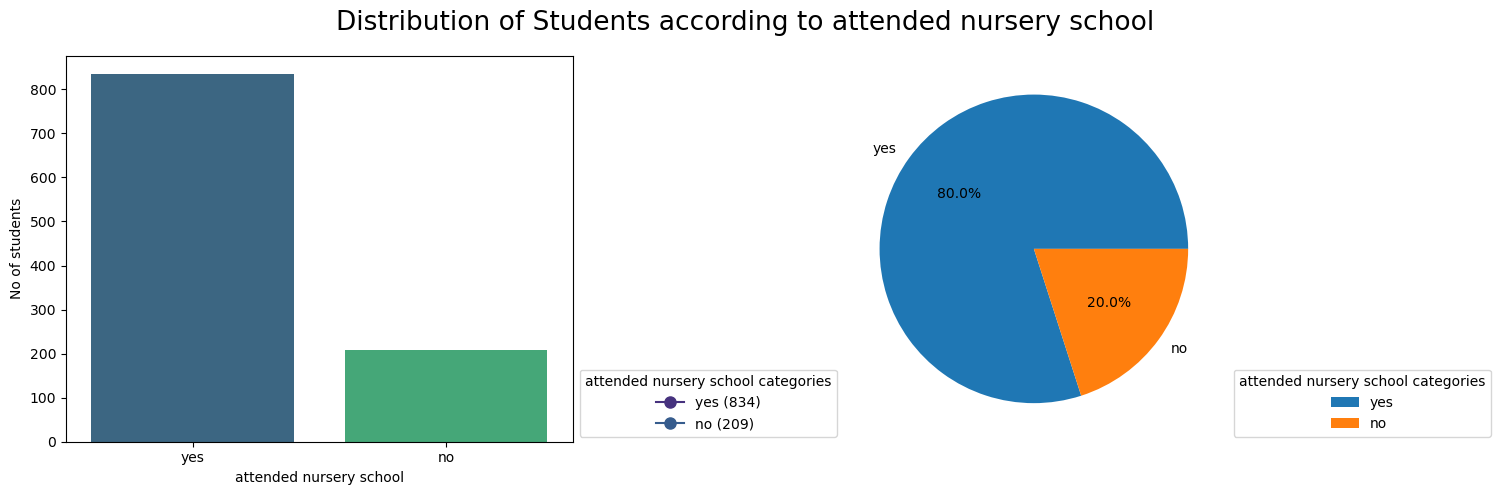

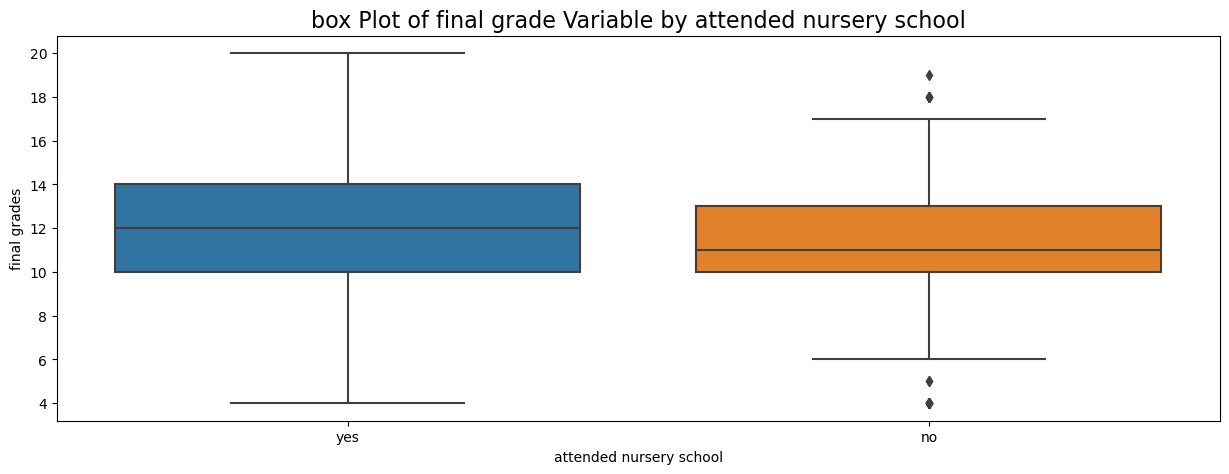

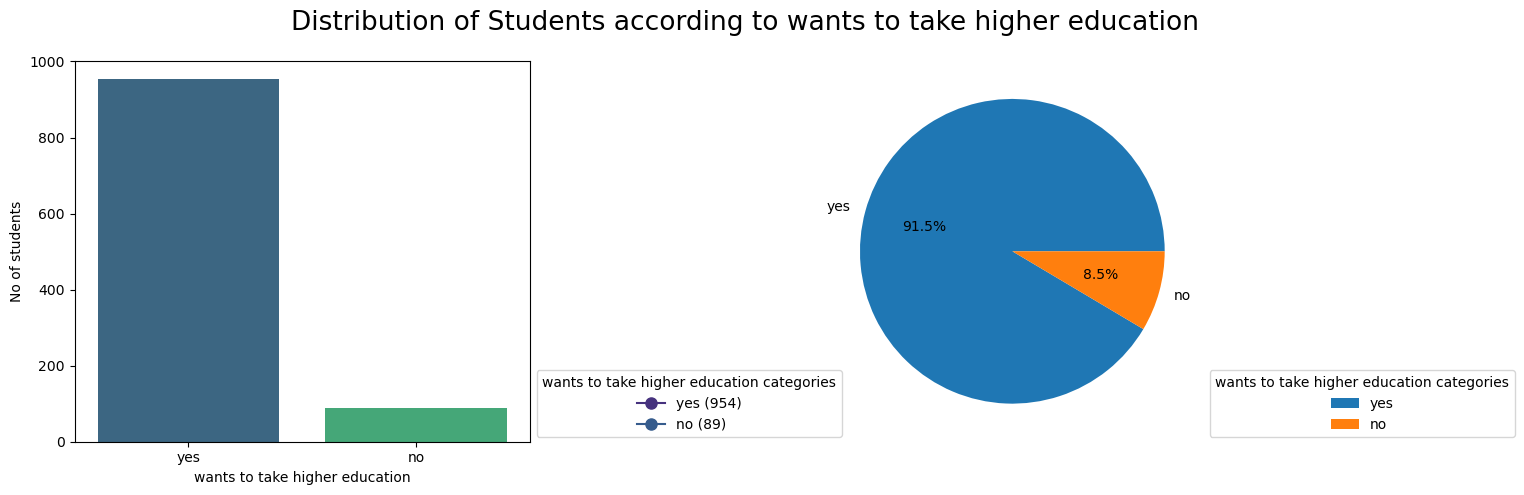

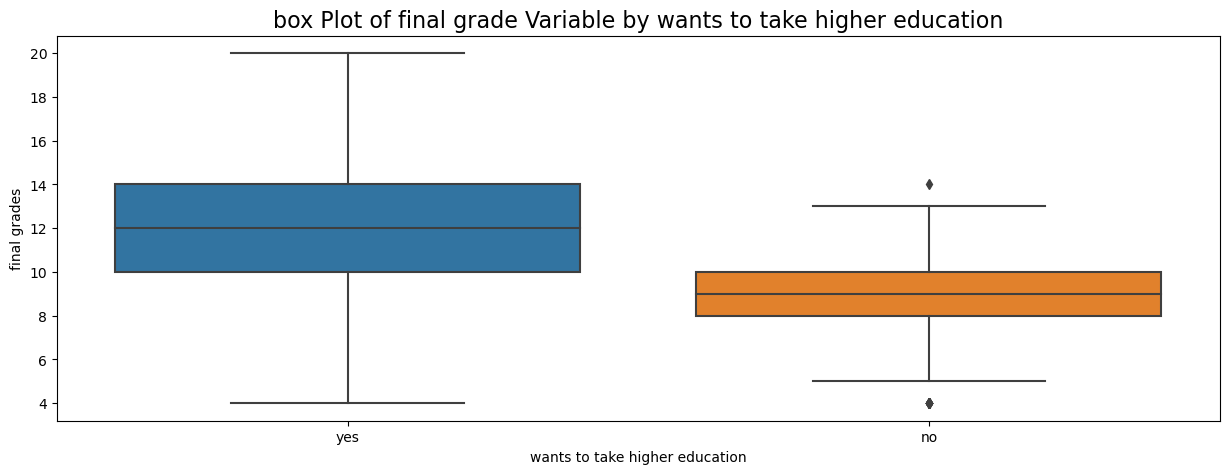

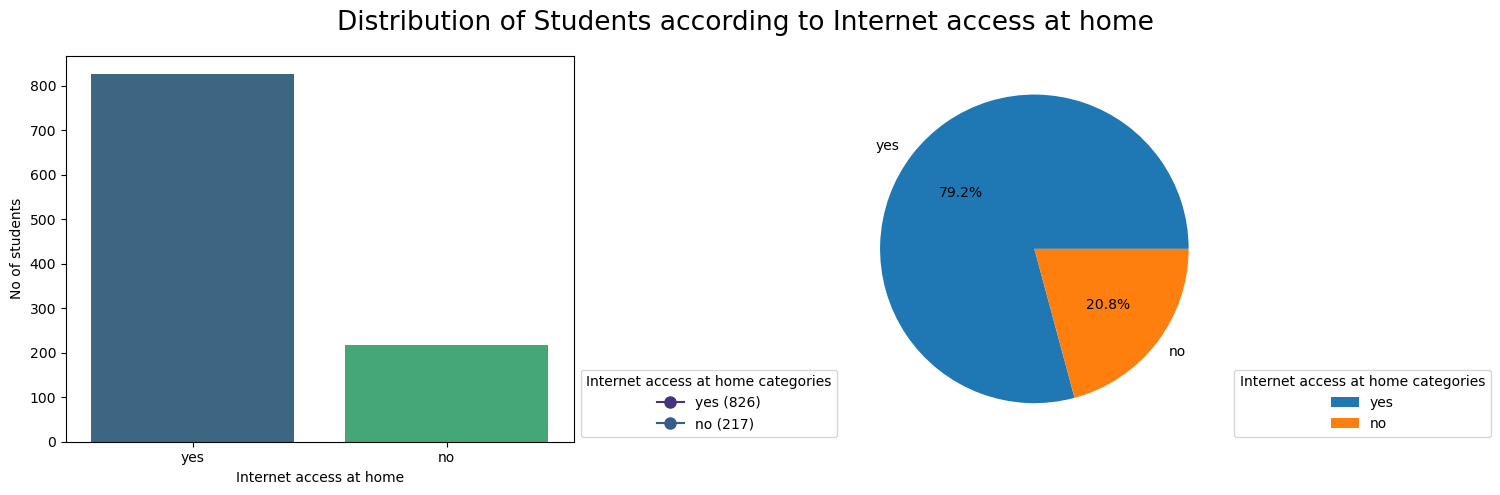

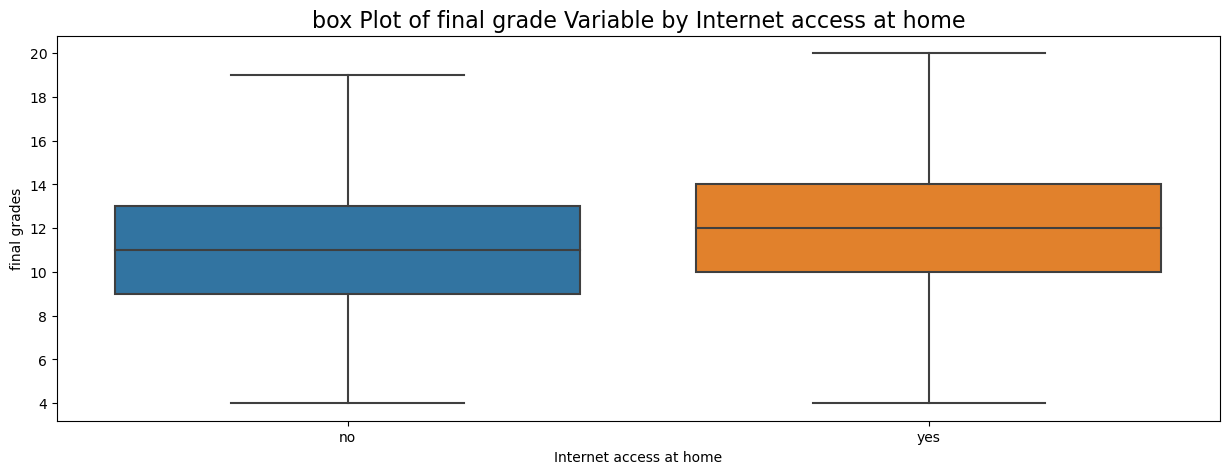

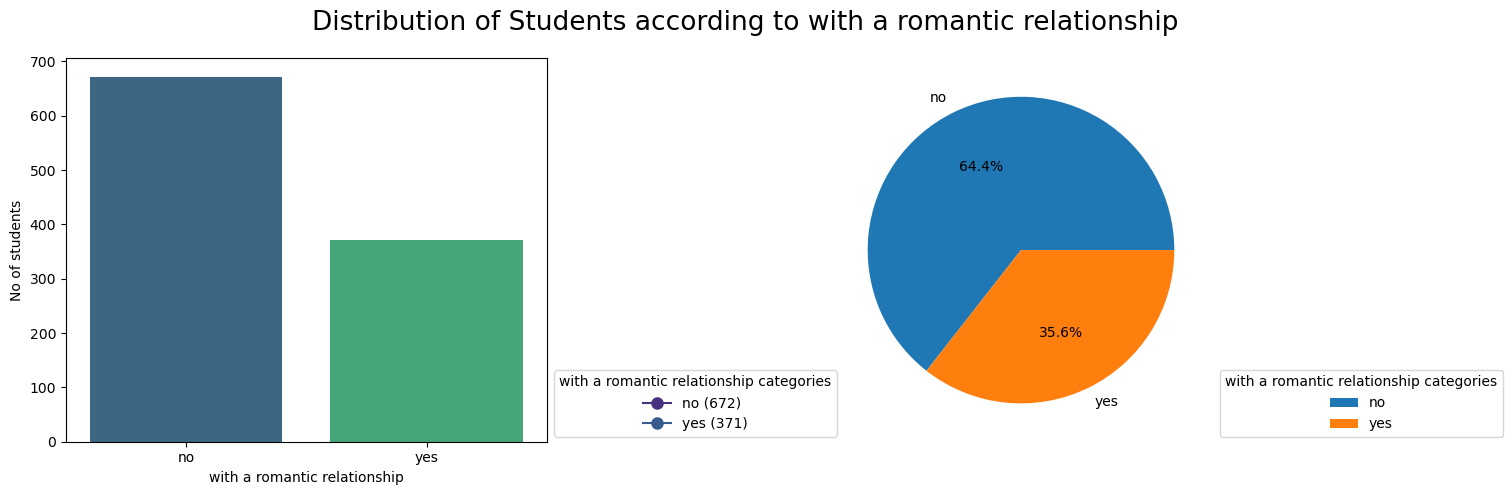

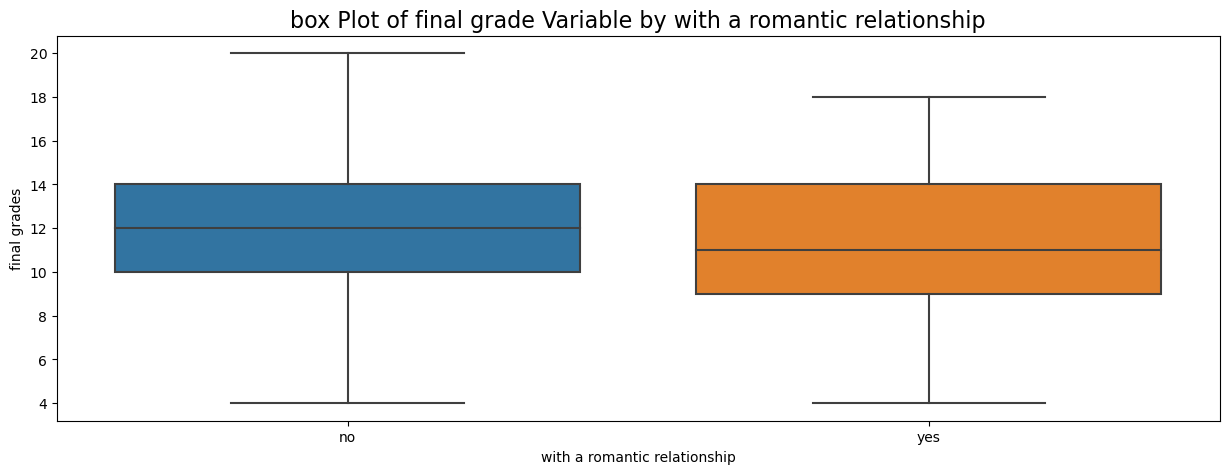

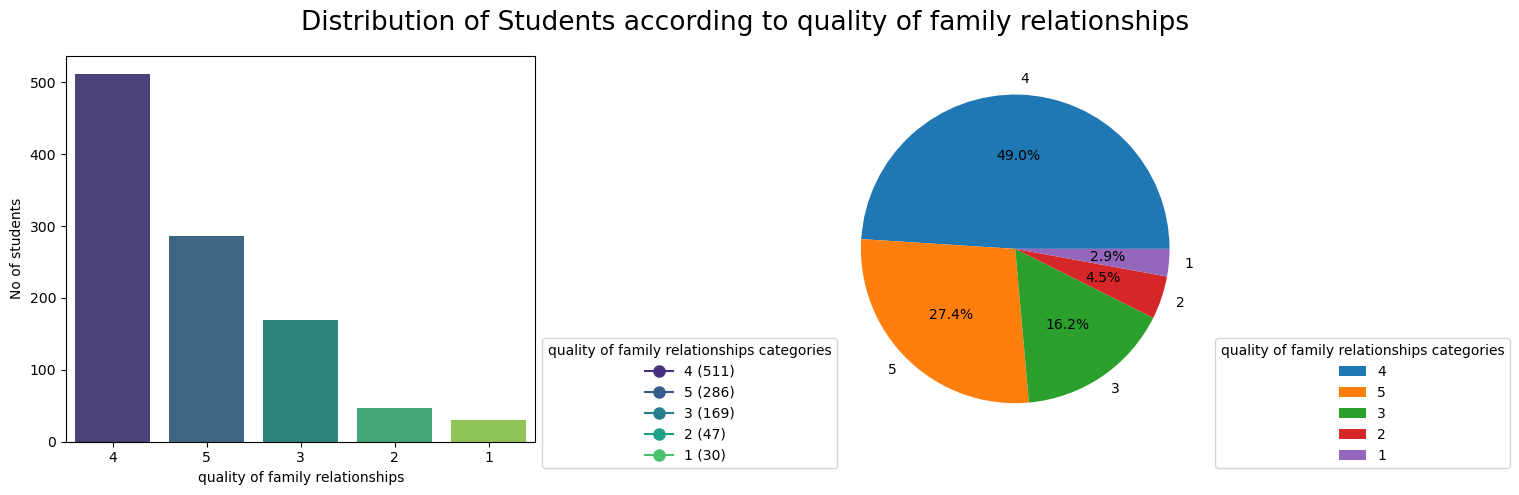

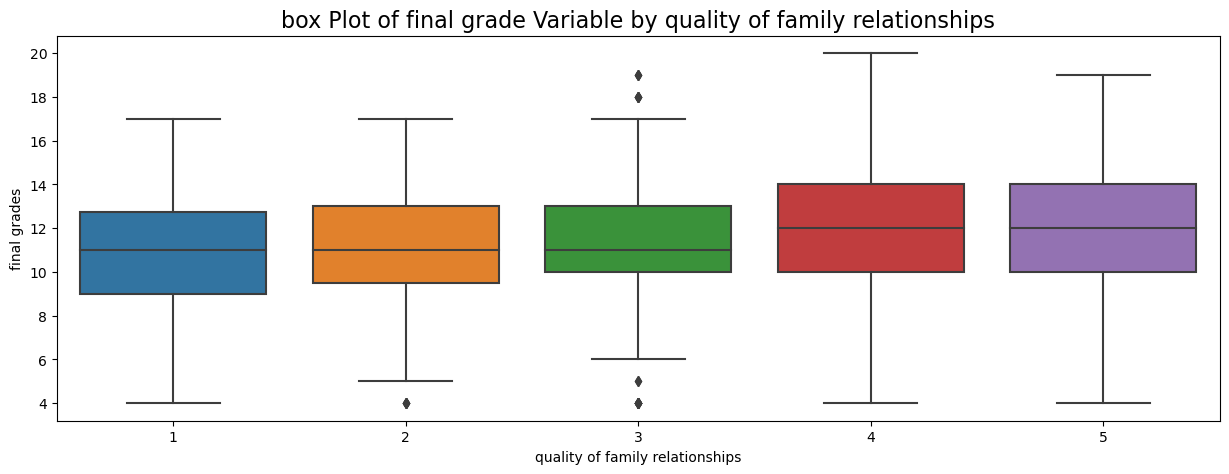

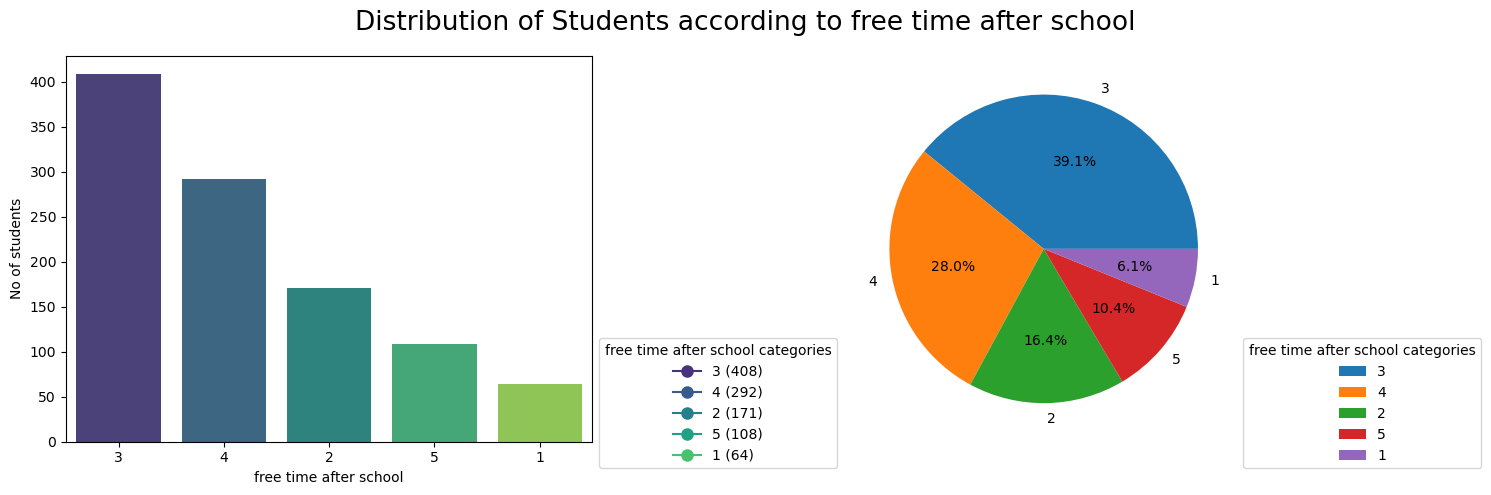

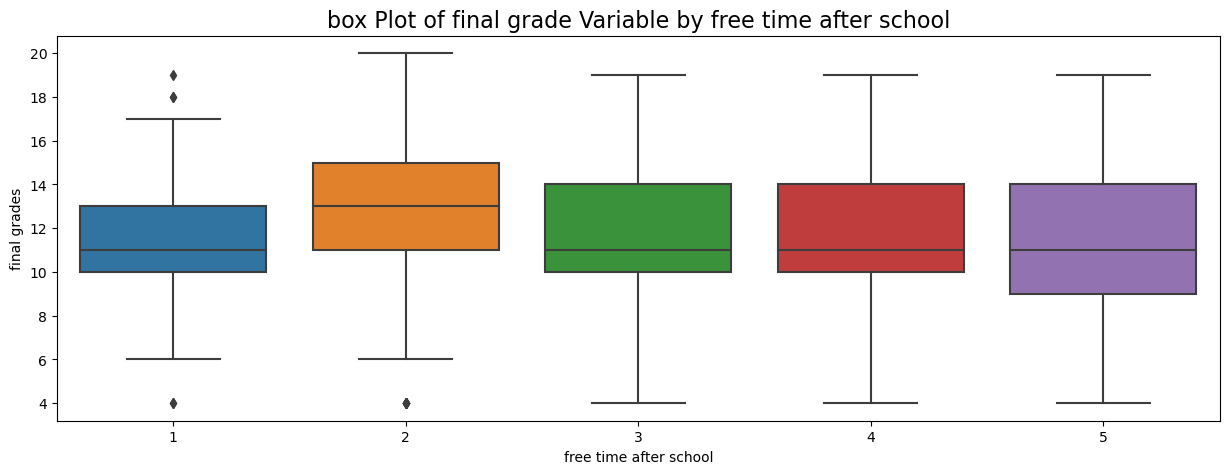

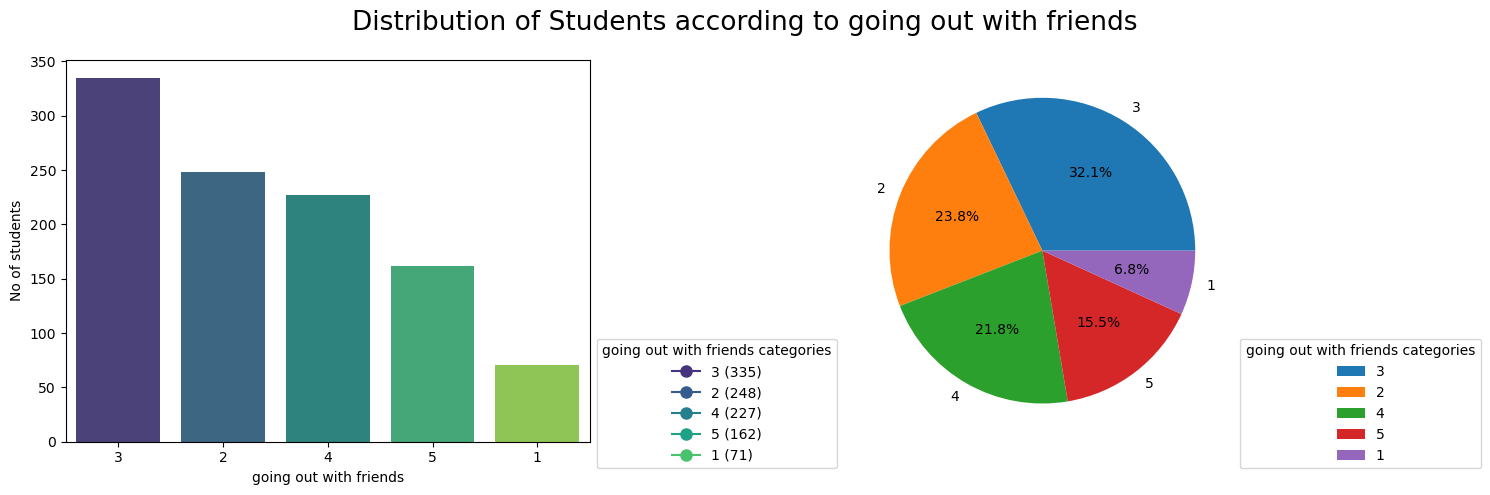

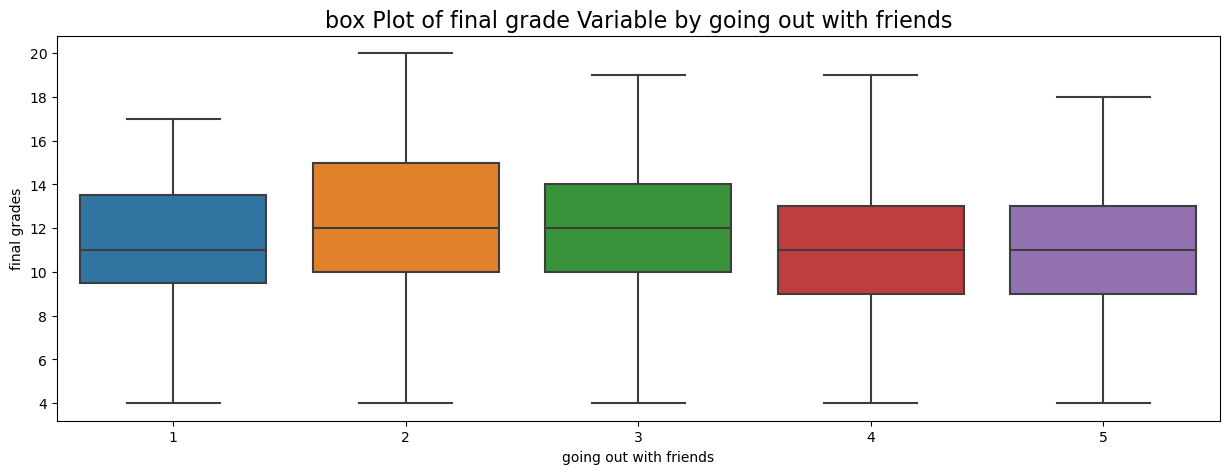

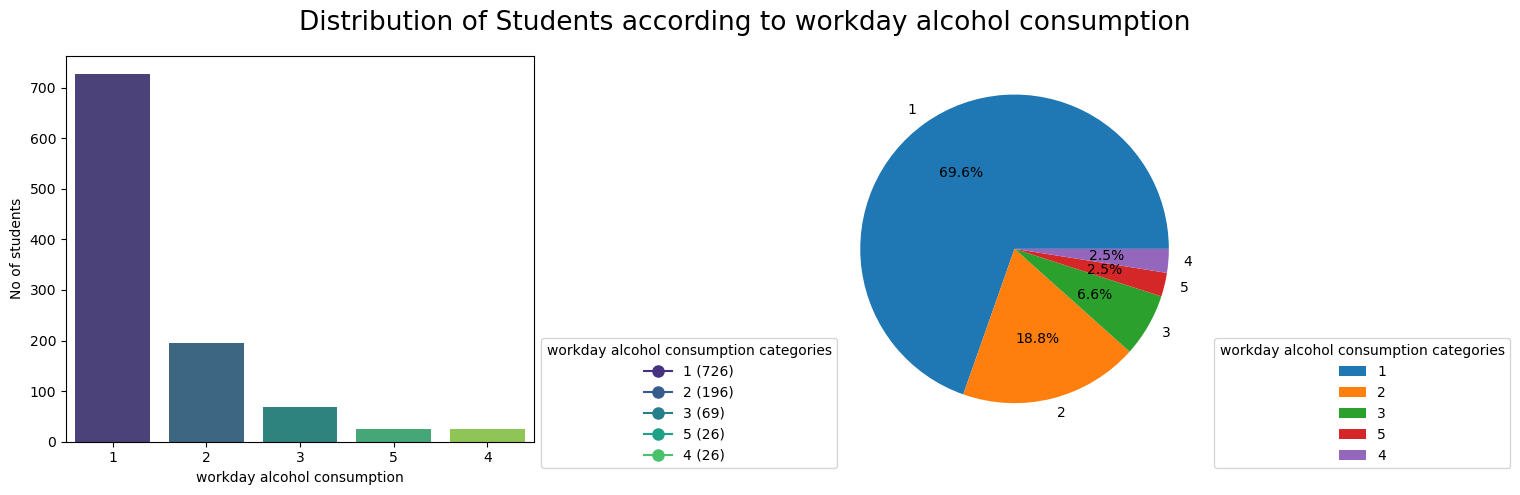

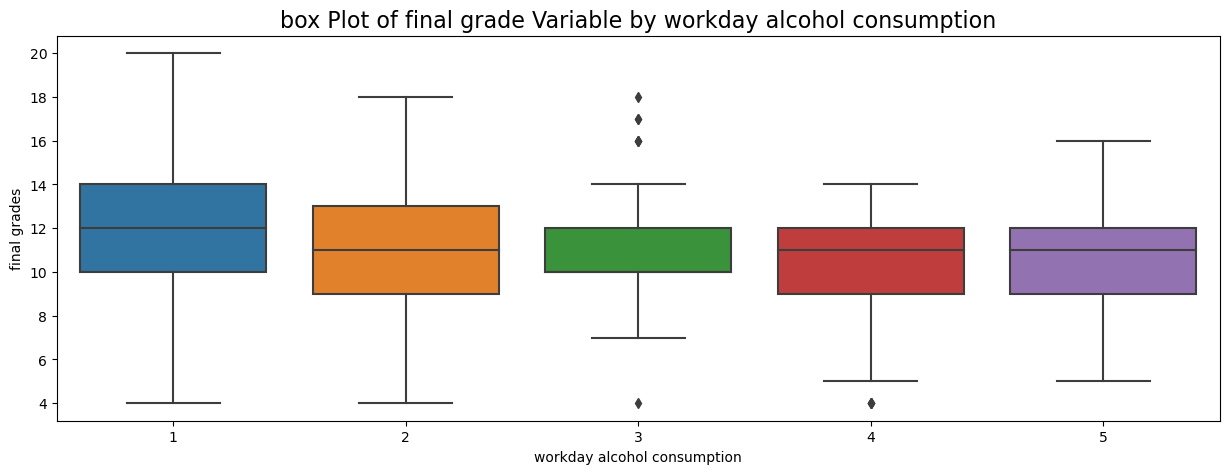

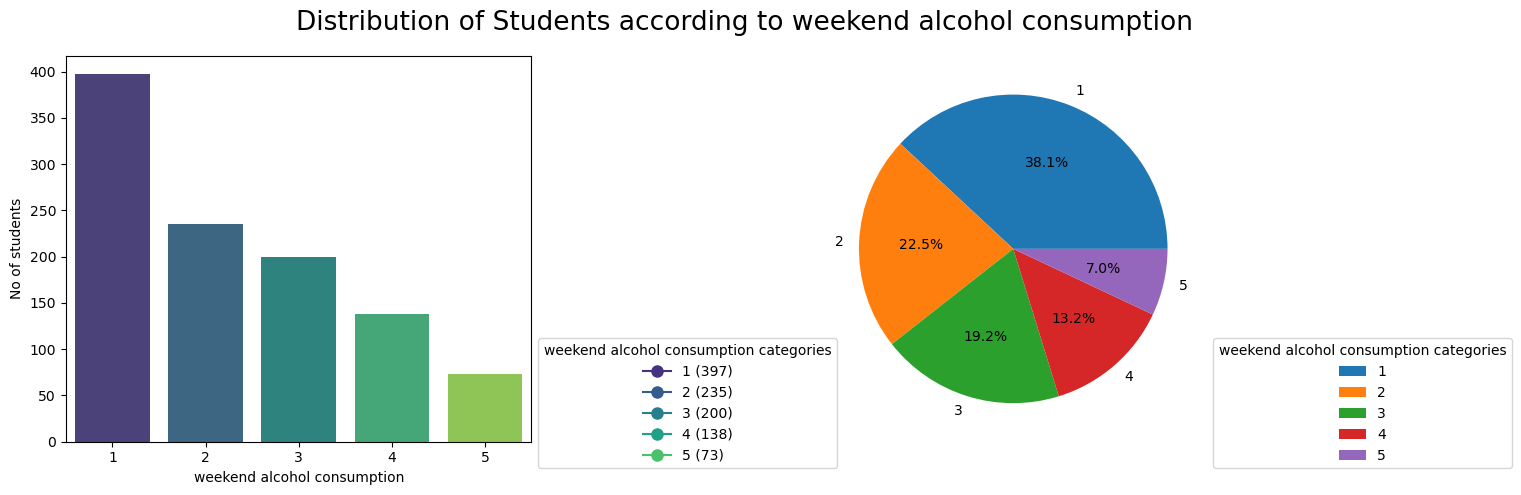

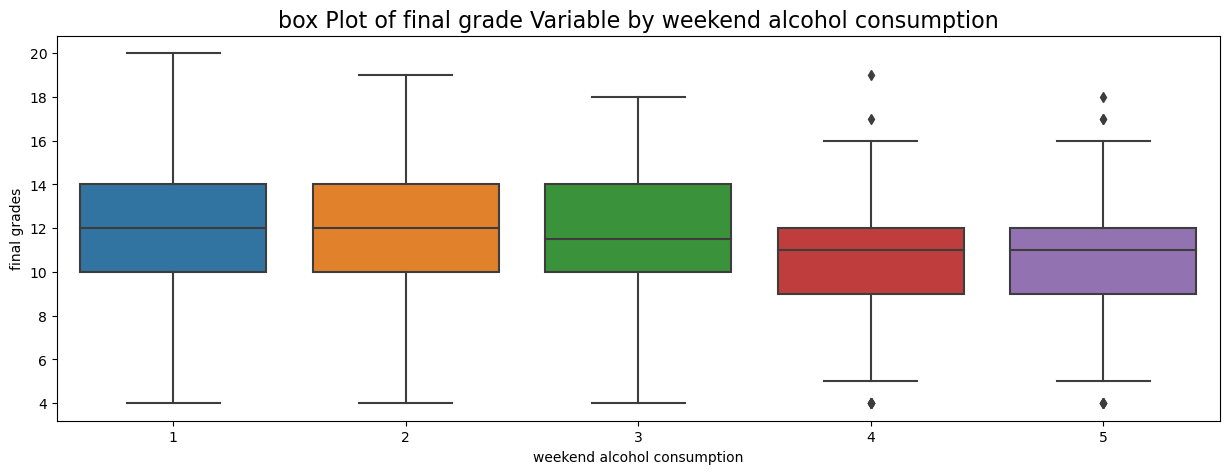

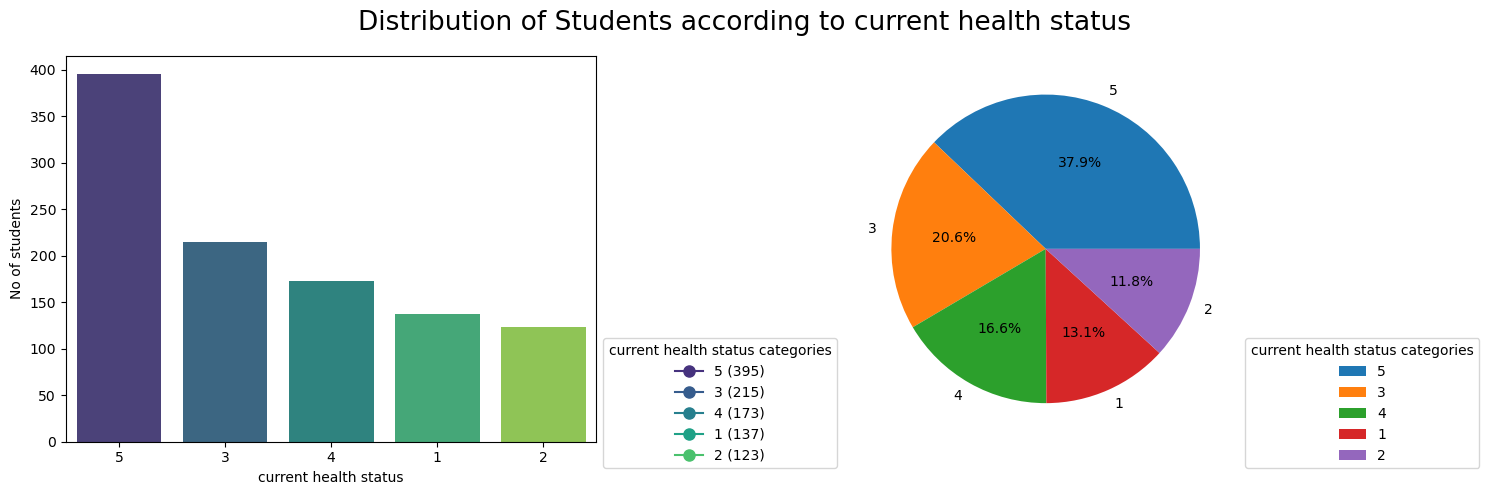

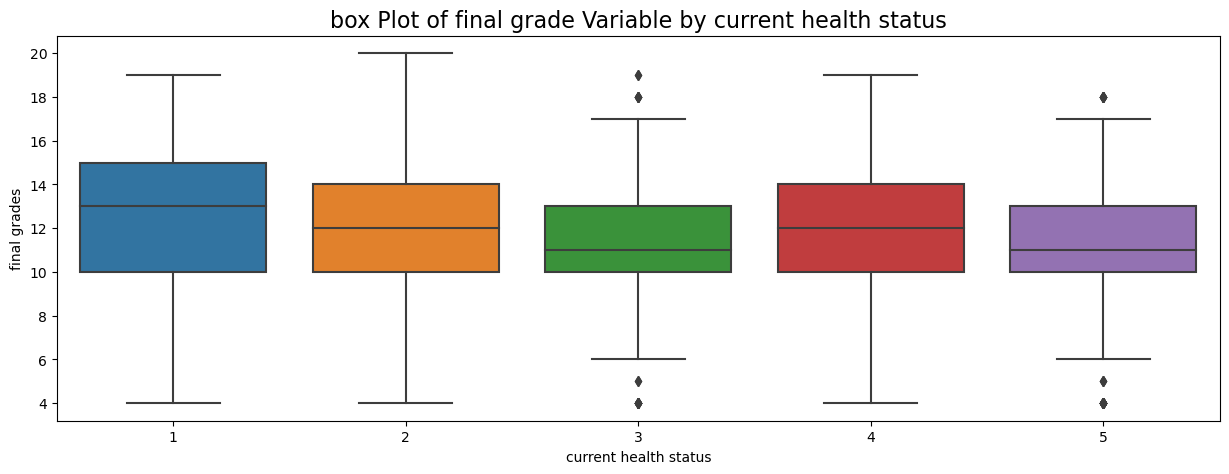

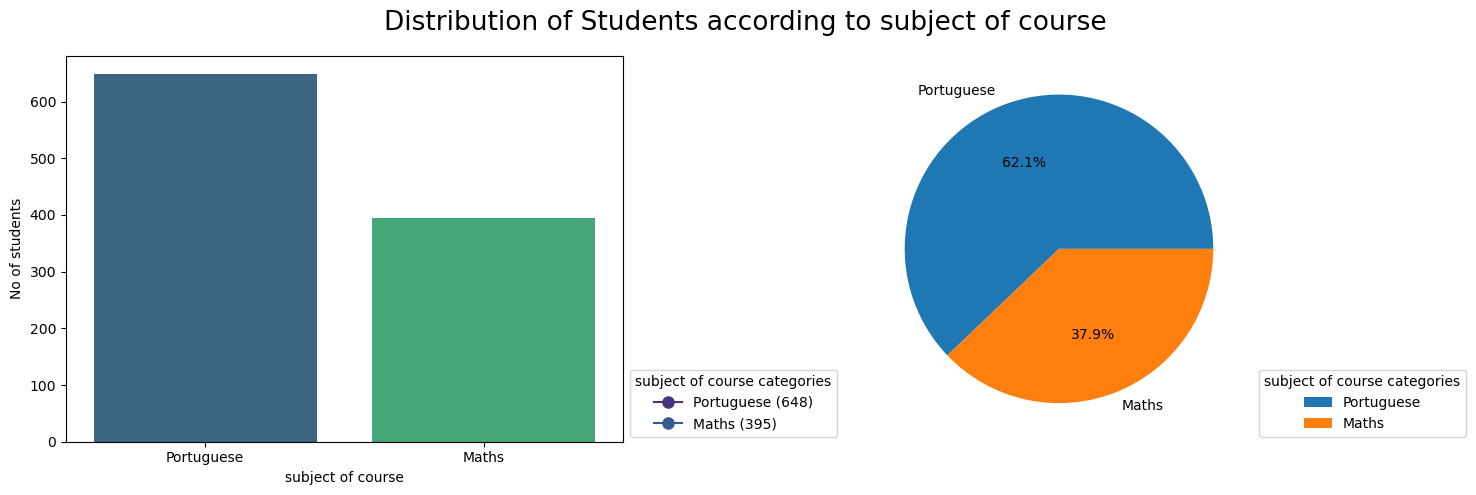

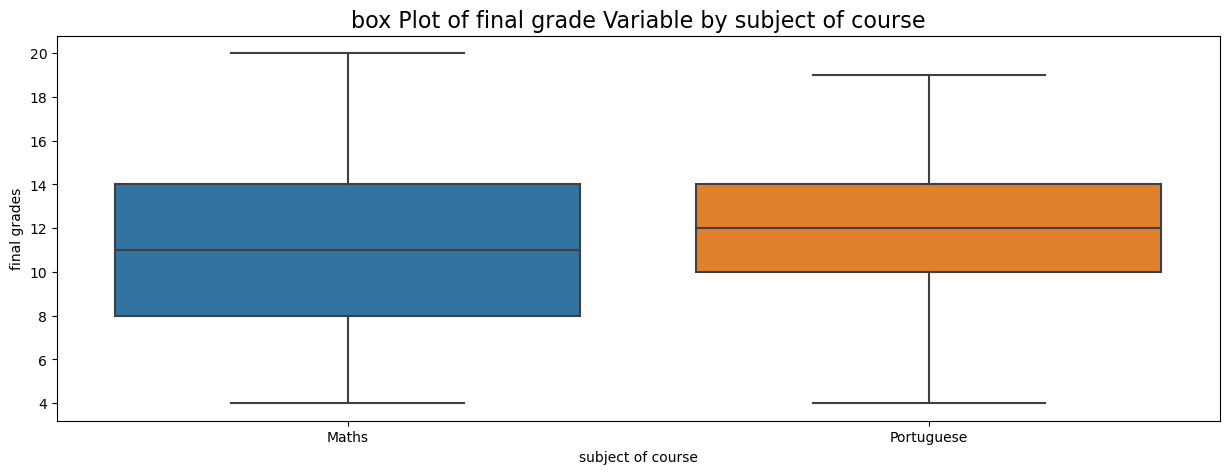

In [22]:
plot_categorical_columns(df)



# function to check association with final grades 
this function check the association with final grades using the chi square test if p value is less than 0.05 then it store the value in the one list and if unique values of that columns is less than 6 then it plot the scatter plot with final grade(G3).

In [25]:
def chi_square_association(df, categorical_column, output_column):
   
    contingency_table = pd.crosstab(df[categorical_column], df[output_column])
    associtated=[]
    BOLD = '\033[1m'
    END_BOLD = '\033[0m'
    chi2, p, _, _ = chi2_contingency(contingency_table)

    print(f"{BOLD}column:{categorical_column}{END_BOLD}")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"{BOLD}P-value: {p}{END_BOLD}")

  
    alpha = 0.05
    print(f"Significance Level: {alpha}")
    print(f"Degrees of Freedom: {(contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)}")

    if p < alpha:
        print(f"{BOLD}There is asignificant association between '{categorical_column}' and '{output_column}{END_BOLD}'.")
        print("   ")
        return categorical_column
    else:
        print(f"There is no significant association between the variables.")
        print("   ")
        return None  

In [26]:
def check_association(df,column_name11):
    columns=[] 
    for column_name in df.columns:
        result=chi_square_association(df, column_name, output_column=column_name11)    
        if  result is not None:
            columns.append(result)
    print("Columns with significant association:")
    print(columns)
    for associatoncolums in columns:
        unique_values= df[associatoncolums].nunique()
        if unique_values >= 6:
            plt.figure(figsize=(7, 5))
            sns.scatterplot(x=associatoncolums, y=column_name11, data=df)
            plt.title(f"scatterplot  of final grade and {associatoncolums}",fontsize=16,loc='center')
            plt.xlabel(f"{associatoncolums}")
            plt.ylabel('final grades')
            plt.show()
    return columns

column:school
Chi-Square Statistic: 50.406785470065294
P-value: 1.9742957393309635e-05
Significance Level: 0.05
Degrees of Freedom: 16
There is asignificant association between 'school' and 'G3'.
   
column:sex
Chi-Square Statistic: 12.233872992583516
P-value: 0.7277295551149745
Significance Level: 0.05
Degrees of Freedom: 16
There is no significant association between the variables.
   
column:age
Chi-Square Statistic: 171.0399996234147
P-value: 3.870372459381649e-06
Significance Level: 0.05
Degrees of Freedom: 96
There is asignificant association between 'age' and 'G3'.
   
column:address
Chi-Square Statistic: 28.035786611001626
P-value: 0.031309848495111745
Significance Level: 0.05
Degrees of Freedom: 16
There is asignificant association between 'address' and 'G3'.
   
column:famsize
Chi-Square Statistic: 20.179936462119393
P-value: 0.21222551621772343
Significance Level: 0.05
Degrees of Freedom: 16
There is no significant association between the variables.
   
column:Pstatus
Chi-Sq

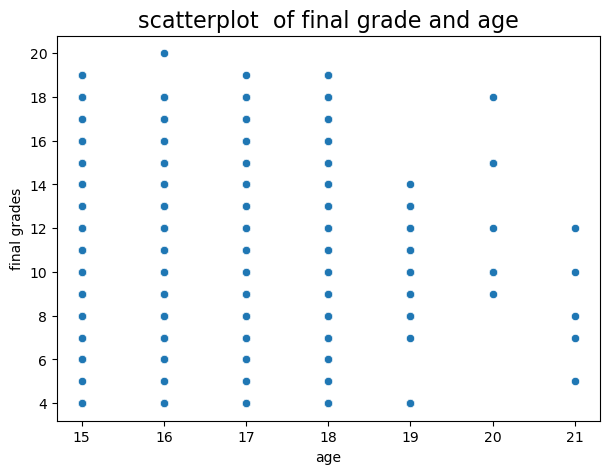

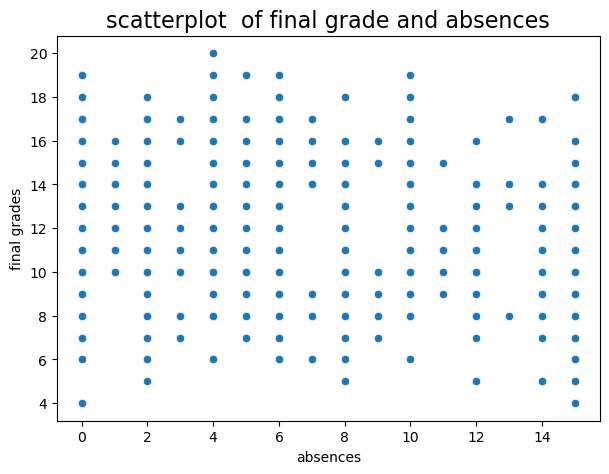

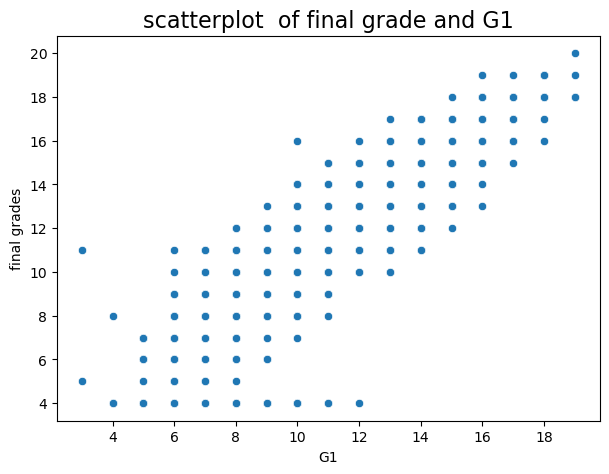

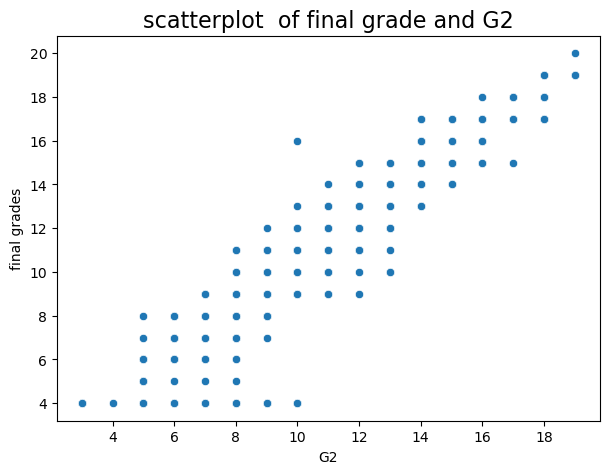

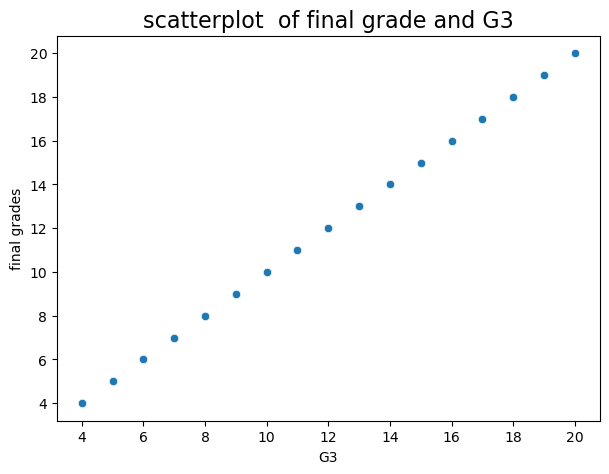

In [27]:
mycolumns=check_association(df,'G3')

# Advanced Question 1 

# Factor Analysis

In [31]:
#create the new dataframe with all columns who have association wuth final grades 
newdf=df[mycolumns]

In [32]:
newdf=newdf.drop(columns=['address','Mjob','romantic'])

In [33]:
object_cols = newdf.select_dtypes(include=['object']).columns.tolist() #SELECT THE COLUMNS WHOSE HAVE DATATYPE OBJECT

# ONEHOT ENCODING

In [34]:
preprocessor = ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first'), object_cols)],remainder='passthrough')#ONEHOT ENCODING OF OBJECT DATATPE COLUMMNS 

# CREATE THE NEW DATAFRAME WITH ENCODED COLUMNS 

In [35]:
df_transformed = pd.DataFrame(preprocessor.fit_transform(newdf), columns=preprocessor.get_feature_names_out(newdf.columns))
df_transformed

,onehot__school_MS,onehot__schoolsup_yes,onehot__higher_yes,onehot__subject_Portuguese,remainder__age,remainder__Medu,remainder__Fedu,remainder__studytime,remainder__failures,remainder__goout,remainder__Dalc,remainder__absences,remainder__G1,remainder__G2,remainder__G3
0,0.0,1.0,1.0,0.0,18.0,4.0,4.0,2.0,0.0,4.0,1.0,6.0,5.0,6.0,6.0
1,0.0,0.0,1.0,0.0,17.0,1.0,1.0,2.0,0.0,3.0,1.0,4.0,5.0,5.0,6.0
2,0.0,1.0,1.0,0.0,15.0,1.0,1.0,2.0,3.0,2.0,2.0,10.0,7.0,8.0,10.0
3,0.0,0.0,1.0,0.0,15.0,4.0,2.0,3.0,0.0,2.0,1.0,2.0,15.0,14.0,15.0
4,0.0,0.0,1.0,0.0,16.0,3.0,3.0,2.0,0.0,2.0,1.0,4.0,6.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,1.0,0.0,1.0,1.0,19.0,2.0,3.0,3.0,1.0,2.0,1.0,4.0,10.0,11.0,10.0
1039,1.0,0.0,1.0,1.0,18.0,3.0,1.0,2.0,0.0,4.0,1.0,4.0,15.0,15.0,16.0
1040,1.0,0.0,1.0,1.0,18.0,1.0,1.0,2.0,0.0,1.0,1.0,6.0,11.0,12.0,9.0
1041,1.0,0.0,1.0,1.0,17.0,3.0,1.0,1.0,0.0,5.0,3.0,6.0,10.0,10.0,10.0


# Split the data for the input and target columns 

In [36]:
X=df_transformed.drop(columns=['remainder__G3']) #INPUT COLUMNS (FEATURES)
Y=df_transformed['remainder__G3'] #target column

# Factor analysis with no of factors one less then no of columns and eigenvalues

In [41]:
from factor_analyzer import FactorAnalyzer
fa=FactorAnalyzer(n_factors=X.shape[1]-1)
fa.fit(X)
eigenvector, value= fa.get_eigenvalues()
eigenvector


array([2.97158398, 1.71681712, 1.4695741 , 1.19340853, 1.01173396,
       0.94088115, 0.86255194, 0.78135516, 0.72927126, 0.68956239,
       0.62330964, 0.54794442, 0.34947881, 0.11252754])

# plot the scree plot to select the no of factors 

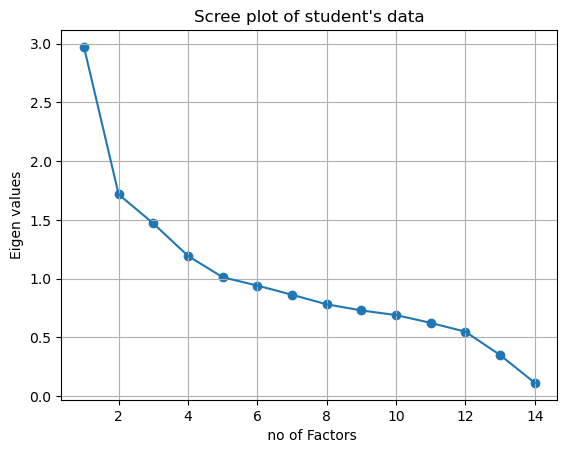

In [42]:
plt.scatter(range(1,X.shape[1]+1),eigenvector)
plt.plot(range(1,X.shape[1]+1),eigenvector)
plt.grid(True)
plt.xlabel(' no of Factors')
plt.ylabel('Eigen values')
plt.title("Scree plot of student's data")
plt.show()

# factor analysis with 6 factors selected from the scree plot 

In [44]:
fa1=FactorAnalyzer(n_factors=6)
fa1.fit(X)
loadings=fa1.loadings_

In [45]:
factor_loading=pd.DataFrame(loadings,index=X.columns)

In [46]:
factor_loading

,0,1,2,3,4,5
onehot__school_MS,-0.235312,0.152353,-0.022699,0.652338,-0.002561,0.070122
onehot__schoolsup_yes,-0.165214,-0.187194,-0.042622,-0.094549,0.112595,-0.005317
onehot__higher_yes,0.049363,-0.051886,0.055405,-0.008234,0.524416,0.103189
onehot__subject_Portuguese,0.097627,-0.026053,-0.041374,0.410517,-0.083768,0.043294
remainder__age,-0.122742,1.110900,0.002232,0.023370,0.269000,0.021257
remainder__Medu,-0.007447,0.030232,0.781065,-0.089776,0.018615,-0.014666
remainder__Fedu,-0.074807,0.004707,0.839864,-0.022342,-0.021160,-0.028173
remainder__studytime,0.038683,0.179705,-0.055149,-0.068333,0.464952,-0.076644
remainder__failures,-0.219748,0.137917,-0.078872,-0.148474,-0.319814,-0.063066
remainder__goout,-0.038606,0.042975,0.019289,0.033080,0.039611,0.393819


# select the columns whose loading value is greater than 0.5 for the factors 

In [47]:
factoredselected_columns = []

# Set a threshold for loading values
loading_threshold = 0.5

for factor in factor_loading.columns:
    factoredselected_columns.extend(factor_loading.index[factor_loading[factor] > loading_threshold])

factoredselected_columns = list(set(factoredselected_columns)) 
factoredselected_columns 
X=X[factoredselected_columns]
X

,remainder__G2,remainder__age,onehot__higher_yes,remainder__Medu,remainder__Fedu,onehot__school_MS,remainder__G1,remainder__Dalc
0,6.0,18.0,1.0,4.0,4.0,0.0,5.0,1.0
1,5.0,17.0,1.0,1.0,1.0,0.0,5.0,1.0
2,8.0,15.0,1.0,1.0,1.0,0.0,7.0,2.0
3,14.0,15.0,1.0,4.0,2.0,0.0,15.0,1.0
4,10.0,16.0,1.0,3.0,3.0,0.0,6.0,1.0
...,...,...,...,...,...,...,...,...
1038,11.0,19.0,1.0,2.0,3.0,1.0,10.0,1.0
1039,15.0,18.0,1.0,3.0,1.0,1.0,15.0,1.0
1040,12.0,18.0,1.0,1.0,1.0,1.0,11.0,1.0
1041,10.0,17.0,1.0,3.0,1.0,1.0,10.0,3.0


# SCALING THE DATA and Split data for training and testing

In [49]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
columns_to_scale = X.columns
# Create a ColumnTransformer
minmax= ColumnTransformer(transformers=[('scaler', MinMaxScaler(), columns_to_scale)],remainder='passthrough')
# Fit and transform the feature data
X2= minmax.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, Y, test_size=0.3, random_state=42)


# train the Model and performence metrices 

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score,r2_score


# Create the model
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
# Evaluate the model using different metrics
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
n = len(y_test)
k = X.shape[1]  # Number of predictors
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))

# Print the performance metrics
print(f'R-squared: {r_squared}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Explained Variance Score: {explained_var}')
print(f'Adjusted R-squared: {adjusted_r_squared}')


R-squared: 0.8543737227182999
Mean Squared Error (MSE): 1.5483366213546303
Mean Absolute Error (MAE): 0.8639699570634074
Explained Variance Score: 0.8543747149276191
Adjusted R-squared: 0.8505414522635183


# Feature Importance Plot 

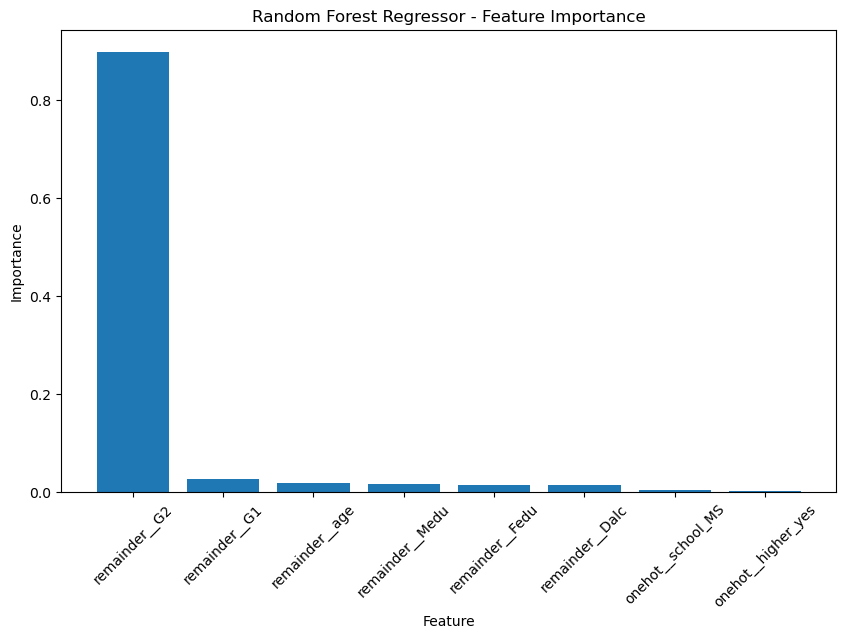

In [51]:
feature_importances = rf_model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances,
})

# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance graph
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Regressor - Feature Importance')
plt.xticks(rotation=45)
plt.show()

# parameter Optimazation for batter performance 

In [232]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100,200,250,300,350,500],
    'max_depth': [None, 10, 20,12,13],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='r2')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)


R-squared Score on Test Set: 0.8710419273018513


# optimized model's performance Metrics 

In [235]:
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
n = len(y_test)
k = X.shape[1]  # Number of predictors
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))

# Print the performance metrics
print(f'Optimized R-squared: {r_squared}')
print(f'Optimized Mean Squared Error (MSE): {mse}')
print(f'Optimized Mean Absolute Error (MAE): {mae}')
print(f'OptimizedExplained Variance Score: {explained_var}')
print(f'OptimizedAdjusted R-squared: {adjusted_r_squared}')

Optimized R-squared: 0.8710419273018513
Optimized Mean Squared Error (MSE): 1.3711159160624085
Optimized Mean Absolute Error (MAE): 0.8240939558623301
OptimizedExplained Variance Score: 0.8710537299924426
OptimizedAdjusted R-squared: 0.8676482938097947


In [233]:
grid_search.best_params_ #for which value of parameter model performance is batter 

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

# Advanced Question 2 Classification Model 
# labeling the data 
1 for poor grades( 0 -8)
2 for avarage grades(8 -16)
3 for the good grades(16-20)

In [40]:
bins = [0, 8, 16, 20]  # Define the bin edges
labels = [1, 2, 3]  # Define the numerical category labels
df_transformed['achievement_category'] = pd.cut(df_transformed['remainder__G3'], bins=bins, labels=labels, include_lowest=True)
df_transformed

,onehot__school_MS,onehot__schoolsup_yes,onehot__higher_yes,onehot__subject_Portuguese,remainder__age,remainder__Medu,remainder__Fedu,remainder__studytime,remainder__failures,remainder__goout,remainder__Dalc,remainder__absences,remainder__G1,remainder__G2,remainder__G3,achievement_category
0,0.0,1.0,1.0,0.0,18.0,4.0,4.0,2.0,0.0,4.0,1.0,6.0,5.0,6.0,6.0,1
1,0.0,0.0,1.0,0.0,17.0,1.0,1.0,2.0,0.0,3.0,1.0,4.0,5.0,5.0,6.0,1
2,0.0,1.0,1.0,0.0,15.0,1.0,1.0,2.0,3.0,2.0,2.0,10.0,7.0,8.0,10.0,2
3,0.0,0.0,1.0,0.0,15.0,4.0,2.0,3.0,0.0,2.0,1.0,2.0,15.0,14.0,15.0,2
4,0.0,0.0,1.0,0.0,16.0,3.0,3.0,2.0,0.0,2.0,1.0,4.0,6.0,10.0,10.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,1.0,0.0,1.0,1.0,19.0,2.0,3.0,3.0,1.0,2.0,1.0,4.0,10.0,11.0,10.0,2
1039,1.0,0.0,1.0,1.0,18.0,3.0,1.0,2.0,0.0,4.0,1.0,4.0,15.0,15.0,16.0,2
1040,1.0,0.0,1.0,1.0,18.0,1.0,1.0,2.0,0.0,1.0,1.0,6.0,11.0,12.0,9.0,2
1041,1.0,0.0,1.0,1.0,17.0,3.0,1.0,1.0,0.0,5.0,3.0,6.0,10.0,10.0,10.0,2


# Split the data for the input and target columns 

In [47]:
X1=df_transformed.drop(columns=['remainder__G3','achievement_category'])
Y1=df_transformed['achievement_category']

# Factor analysis for the classifaction task 

In [48]:

fa2=FactorAnalyzer(n_factors=6)
fa2.fit(X1)
loadings=fa2.loadings_
factor_loading=pd.DataFrame(loadings,index=X1.columns)
factoredselected_columns = []

# Set a threshold for loading values
loading_threshold = 0.5

for factor in factor_loading.columns:
    factoredselected_columns.extend(factor_loading.index[factor_loading[factor] > loading_threshold])

factoredselected_columns = list(set(factoredselected_columns)) 
factoredselected_columns 
X1=X1[factoredselected_columns]

# scaling and split data for the training and testing 

In [49]:

columns_to_scale = X1.columns
# Create a ColumnTransformer
minmax= ColumnTransformer(transformers=[('scaler', MinMaxScaler(), columns_to_scale)],remainder='passthrough')
# Fit and transform the feature data
X2= minmax.fit_transform(X1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, Y1, test_size=0.3, random_state=42)


# TRAIN THE MODEL AND MAKE PREDICTION

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# PERFORMANCE METRIC AND ACCURACY 

In [52]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.80      0.80        49
           2       0.95      0.95      0.95       246
           3       0.83      0.83      0.83        18

    accuracy                           0.92       313
   macro avg       0.86      0.86      0.86       313
weighted avg       0.92      0.92      0.92       313

Confusion Matrix:
[[ 39  10   0]
 [ 10 233   3]
 [  0   3  15]]


# parameters for the  Optimized model 

In [46]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200,300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print other metrics if needed
print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.78      0.80        49
           2       0.94      0.96      0.95       246
           3       0.83      0.83      0.83        18

    accuracy                           0.92       313
   macro avg       0.87      0.85      0.86       313
weighted avg       0.92      0.92      0.92       313

Confusion Matrix:
[[ 38  11   0]
 [  8 235   3]
 [  0   3  15]]
